### Spark SQL:
##### Spark SQL is a component on top of Spark Core that introduced a data abstraction called DataFrames, which provides support for structured and semi-structured data. Spark SQL provides a domain-specific language (DSL) to manipulate DataFrames in Scala, Java, Python or .NET.
##### What is DSL?
- ##### DSL is popular and powerful way to express transformations.
- The DSL cosists of :
  - The Column class: Represents a column (generally computed) 
  - DataFrame methods (e.g. agg, groupBy, select)
  - Auxiliary functions, e.g. pyspark.sql.functions
  - Below, the DSL expression is: folksDF.age>25
    - folksDF.filter(folksDF.age>25)
 

#### Introducing class Column
- Column: Core DSL class representing a DataFrame column
  - Generally computed from data in the dataframe
  - module: pyspark.sql
- Many DataFrame operations take Column parameters – e.g. filter(condition)
  - Condition can be Column-based or an SQL expression 
  - pyspark.sql.functions.col(colName: str)provides access to a specific column based on provided name
- Column can be used with expression operators
  - e.g. < (LT), > (GT), == (equality), != (inequality), etc.
  - Expressions are then passed to DataFrame transformations 
  - Let's look at some examples
   - Access a dataframe instance's column via the col() function from pyspark.sql.functions import col
  - Use operators to create expressions
  - Below, we create a Column instance specifying "all rows with the age column holding a value > 25"        folksDF.filter(col("age") > 25) 
  - Other equivalents for the above (some seen before) 
     - folksDF.filter(folksDF["age"] > 25) 
     - folksDF.filter("age > 25")
     - folksDF.filter(folksDF.age>25)



In [1]:
#Build basic spark session
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL Demo") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [2]:
spark

In [3]:
# Create dataframe in spark
# Import package library for datatype 
from pyspark.sql.types import *
#Create schema using StructType 
myschema=StructType().add("Name",StringType()).add("Gender",StringType()).add("Age",IntegerType())
# Create data to load into dataframe
data=[("James","M",30),
    ("Michael","M",40),
    ("Robert","M",40),
    ("Maria","F",40),
    ("Jen","F",29)]
#Create Dataframe spark.createDataframe(data,schema)
dfdemo=spark.createDataFrame(data,myschema)


In [4]:
#Take look in dataframe and schema
myschema.fieldNames()

['Name', 'Gender', 'Age']

In [5]:
#Display Dataframe
dfdemo.show()

+-------+------+---+
|   Name|Gender|Age|
+-------+------+---+
|  James|     M| 30|
|Michael|     M| 40|
| Robert|     M| 40|
|  Maria|     F| 40|
|    Jen|     F| 29|
+-------+------+---+



In [6]:
dfdemo.groupBy("Gender").count().show()

+------+-----+
|Gender|count|
+------+-----+
|     F|    2|
|     M|    3|
+------+-----+



In [8]:
dfdemo.groupBy("Gender").count().explain(True)

== Parsed Logical Plan ==
'Aggregate ['Gender], [unresolvedalias('Gender, None), count(1) AS count#47L]
+- AnalysisBarrier
      +- LogicalRDD [Name#0, Gender#1, Age#2], false

== Analyzed Logical Plan ==
Gender: string, count: bigint
Aggregate [Gender#1], [Gender#1, count(1) AS count#47L]
+- LogicalRDD [Name#0, Gender#1, Age#2], false

== Optimized Logical Plan ==
Aggregate [Gender#1], [Gender#1, count(1) AS count#47L]
+- Project [Gender#1]
   +- LogicalRDD [Name#0, Gender#1, Age#2], false

== Physical Plan ==
*(2) HashAggregate(keys=[Gender#1], functions=[count(1)], output=[Gender#1, count#47L])
+- Exchange hashpartitioning(Gender#1, 200)
   +- *(1) HashAggregate(keys=[Gender#1], functions=[partial_count(1)], output=[Gender#1, count#51L])
      +- *(1) Project [Gender#1]
         +- Scan ExistingRDD[Name#0,Gender#1,Age#2]


In [ ]:
# count the items in dataframe
dfdemo.count()

In [ ]:
# Make the SQl view to apply sql query
dfdemo.createOrReplaceTempView("dfSql")
spark.sql("Select count(1) from dfSql").show()

In [8]:
spark.sql("Select count(*) from dfSql").show()

+--------+
|count(1)|
+--------+
|       5|
+--------+



In [9]:
spark.sql("Select count(Name) from dfSql").show()

+-----------+
|count(Name)|
+-----------+
|          5|
+-----------+



In [10]:
#Define dataset with .csv 
df=spark.read.option("header",True).csv("/home/ec2-user/influenza.csv")

In [11]:
#Display the dataframe
df.show()

+---------+---------+----------+--------------+-----------------+---------------+----------------+----------------+
|   season|date_code|weekending|        region|Respiratory_Virus|Number_Positive|Specimens_Tested|Percent_Positive|
+---------+---------+----------+--------------+-----------------+---------------+----------------+----------------+
|2009-2010|   200940|  10/10/09|      Bay Area|      Influenza_A|             36|             220|           16.36|
|2009-2010|   200940|  10/10/09|      Bay Area|      Influenza_B|              0|             220|            0.00|
|2009-2010|   200940|  10/10/09|      Bay Area|  Total_Influenza|             36|             220|           16.36|
|2009-2010|   200940|  10/10/09|      Bay Area|              RSV|              0|             190|            0.00|
|2009-2010|   200940|  10/10/09|    California|      Influenza_A|           1077|            3324|           32.40|
|2009-2010|   200940|  10/10/09|    California|      Influenza_B|       

In [12]:
#Describe the schema for Dataframe
df.printSchema()

root
 |-- season: string (nullable = true)
 |-- date_code: string (nullable = true)
 |-- weekending: string (nullable = true)
 |-- region: string (nullable = true)
 |-- Respiratory_Virus: string (nullable = true)
 |-- Number_Positive: string (nullable = true)
 |-- Specimens_Tested: string (nullable = true)
 |-- Percent_Positive: string (nullable = true)



#### Dataframe transformation:
- ##### Python-Based Column Access
   - Python has convenient syntax for accessing a column in a DataFrame (Scala has a different syntax).

In [13]:
# Select only the "Respiratory_Virus" column
df.select("Respiratory_Virus").show()

+-----------------+
|Respiratory_Virus|
+-----------------+
|      Influenza_A|
|      Influenza_B|
|  Total_Influenza|
|              RSV|
|      Influenza_A|
|      Influenza_B|
|  Total_Influenza|
|              RSV|
|      Influenza_A|
|      Influenza_B|
|  Total_Influenza|
|              RSV|
|      Influenza_A|
|      Influenza_B|
|  Total_Influenza|
|              RSV|
|      Influenza_A|
|      Influenza_B|
|  Total_Influenza|
|              RSV|
+-----------------+
only showing top 20 rows



In [14]:
# select multiple columns
df.select("Respiratory_Virus","region").show()

+-----------------+--------------+
|Respiratory_Virus|        region|
+-----------------+--------------+
|      Influenza_A|      Bay Area|
|      Influenza_B|      Bay Area|
|  Total_Influenza|      Bay Area|
|              RSV|      Bay Area|
|      Influenza_A|    California|
|      Influenza_B|    California|
|  Total_Influenza|    California|
|              RSV|    California|
|      Influenza_A|       Central|
|      Influenza_B|       Central|
|  Total_Influenza|       Central|
|              RSV|       Central|
|      Influenza_A|Lower Southern|
|      Influenza_B|Lower Southern|
|  Total_Influenza|Lower Southern|
|              RSV|Lower Southern|
|      Influenza_A|      Northern|
|      Influenza_B|      Northern|
|  Total_Influenza|      Northern|
|              RSV|      Northern|
+-----------------+--------------+
only showing top 20 rows



In [15]:
#Filter the selected columns by number of positive cases greater than 0 ,
df.select("region","Respiratory_Virus","Number_Positive").filter(df["Number_Positive"]>0).show()

+--------------------+-----------------+---------------+
|              region|Respiratory_Virus|Number_Positive|
+--------------------+-----------------+---------------+
|            Bay Area|      Influenza_A|             36|
|            Bay Area|  Total_Influenza|             36|
|          California|      Influenza_A|           1077|
|          California|      Influenza_B|              3|
|          California|  Total_Influenza|           1080|
|          California|              RSV|              2|
|             Central|      Influenza_A|            202|
|             Central|      Influenza_B|              1|
|             Central|  Total_Influenza|            203|
|      Lower Southern|      Influenza_A|             21|
|      Lower Southern|  Total_Influenza|             21|
|   Northern/Bay Area|      Influenza_A|            627|
|   Northern/Bay Area|      Influenza_B|              1|
|   Northern/Bay Area|  Total_Influenza|            628|
|   Northern/Bay Area|         

In [16]:
df.select("region","Respiratory_Virus","Number_Positive").filter((df["Number_Positive"]>500) & (df["Number_Positive"]<1000)).show()

+-----------------+-----------------+---------------+
|           region|Respiratory_Virus|Number_Positive|
+-----------------+-----------------+---------------+
|Northern/Bay Area|      Influenza_A|            627|
|Northern/Bay Area|  Total_Influenza|            628|
|Northern/Bay Area|      Influenza_A|            920|
|Northern/Bay Area|  Total_Influenza|            924|
|Northern/Bay Area|      Influenza_A|            848|
|Northern/Bay Area|  Total_Influenza|            849|
|       California|      Influenza_A|            985|
|       California|  Total_Influenza|            986|
|Northern/Bay Area|      Influenza_A|            534|
|Northern/Bay Area|  Total_Influenza|            534|
|       California|      Influenza_A|            811|
|       California|  Total_Influenza|            814|
|       California|      Influenza_A|            501|
|       California|  Total_Influenza|            504|
|       California|              RSV|            603|
|       California|         

In [17]:
df.select("region","Respiratory_Virus","Number_Positive").filter((df["Number_Positive"]>500) & (df["Number_Positive"]<1000)).explain()

== Physical Plan ==
*(1) Project [region#68, Respiratory_Virus#69, Number_Positive#70]
+- *(1) Filter ((isnotnull(Number_Positive#70) && (cast(Number_Positive#70 as int) > 500)) && (cast(Number_Positive#70 as int) < 1000))
   +- *(1) FileScan csv [region#68,Respiratory_Virus#69,Number_Positive#70] Batched: false, Format: CSV, Location: InMemoryFileIndex[file:/home/ec2-user/influenza.csv], PartitionFilters: [], PushedFilters: [IsNotNull(Number_Positive)], ReadSchema: struct<region:string,Respiratory_Virus:string,Number_Positive:string>


#### Use Case: Note also, that if combining boolean expressions, you may need to explicitly parenthesize due to Python syntax requirements.

In [18]:
df.select("region","Respiratory_Virus","Number_Positive").filter(("Number_Positive >500") & ("Number_Positive<1000")).show()

TypeError: unsupported operand type(s) for &: 'str' and 'str'

In [19]:
df.select("region","Respiratory_Virus","Number_Positive").filter(("Number_Positive">500) & ("Number_Positive"<1000)).show()

TypeError: '>' not supported between instances of 'str' and 'int'

In [20]:
df.select("region","Respiratory_Virus","Number_Positive").filter((df.Number_Positive>500) & (df.Number_Positive<1000)).show()

+-----------------+-----------------+---------------+
|           region|Respiratory_Virus|Number_Positive|
+-----------------+-----------------+---------------+
|Northern/Bay Area|      Influenza_A|            627|
|Northern/Bay Area|  Total_Influenza|            628|
|Northern/Bay Area|      Influenza_A|            920|
|Northern/Bay Area|  Total_Influenza|            924|
|Northern/Bay Area|      Influenza_A|            848|
|Northern/Bay Area|  Total_Influenza|            849|
|       California|      Influenza_A|            985|
|       California|  Total_Influenza|            986|
|Northern/Bay Area|      Influenza_A|            534|
|Northern/Bay Area|  Total_Influenza|            534|
|       California|      Influenza_A|            811|
|       California|  Total_Influenza|            814|
|       California|      Influenza_A|            501|
|       California|  Total_Influenza|            504|
|       California|              RSV|            603|
|       California|         

In [21]:
df.filter((df["region"]=="California")&(df["Respiratory_Virus"]=="Influenza_B")).show()

+---------+---------+----------+----------+-----------------+---------------+----------------+----------------+
|   season|date_code|weekending|    region|Respiratory_Virus|Number_Positive|Specimens_Tested|Percent_Positive|
+---------+---------+----------+----------+-----------------+---------------+----------------+----------------+
|2009-2010|   200940|  10/10/09|California|      Influenza_B|              3|            3324|            0.09|
|2009-2010|   200941|  10/17/09|California|      Influenza_B|              5|            3693|            0.14|
|2009-2010|   200942|  10/24/09|California|      Influenza_B|              3|            3642|            0.08|
|2009-2010|   200943|  10/31/09|California|      Influenza_B|              1|            3013|            0.03|
|2009-2010|   200944|  11/07/09|California|      Influenza_B|              3|            2771|            0.11|
|2009-2010|   200945|  11/14/09|California|      Influenza_B|              3|            2546|          

In [22]:
df.filter((df["region"]=="California")&(df["Respiratory_Virus"]=="Influenza_B")).explain()

== Physical Plan ==
*(1) Project [season#65, date_code#66, weekending#67, region#68, Respiratory_Virus#69, Number_Positive#70, Specimens_Tested#71, Percent_Positive#72]
+- *(1) Filter (((isnotnull(region#68) && isnotnull(Respiratory_Virus#69)) && (region#68 = California)) && (Respiratory_Virus#69 = Influenza_B))
   +- *(1) FileScan csv [season#65,date_code#66,weekending#67,region#68,Respiratory_Virus#69,Number_Positive#70,Specimens_Tested#71,Percent_Positive#72] Batched: false, Format: CSV, Location: InMemoryFileIndex[file:/home/ec2-user/influenza.csv], PartitionFilters: [], PushedFilters: [IsNotNull(region), IsNotNull(Respiratory_Virus), EqualTo(region,California), EqualTo(Respiratory..., ReadSchema: struct<season:string,date_code:string,weekending:string,region:string,Respiratory_Virus:string,Nu...


In [23]:
df.groupBy("region").count().show()

+--------------------+-----+
|              region|count|
+--------------------+-----+
|   Northern/Bay Area|   52|
|            Northern| 7137|
|      Lower Southern| 7137|
|             Central| 7137|
|Upper/Lower Southern| 7137|
|      Upper Southern| 7137|
|            Bay Area| 7137|
|          California| 7137|
+--------------------+-----+



In [24]:
df.groupBy("Respiratory_Virus").count().show()

+--------------------+-----+
|   Respiratory_Virus|count|
+--------------------+-----+
|     Parainfluenza_3| 2555|
|Parainfluenza_Unk...| 2555|
| Total_Parainfluenza| 2555|
|    Coronavirus_229E| 1820|
|    Coronavirus_NL63| 1820|
|     Total_Influenza| 4024|
|Enterovirus_Rhino...| 2555|
|   Total_Coronavirus| 1820|
|         Influenza_B| 4024|
|         Influenza_A| 4024|
|     Parainfluenza_1| 2555|
|    Coronavirus_HKU1| 1820|
|     Parainfluenza_2| 2555|
|Coronavirus_Unkno...| 1820|
|          Adenovirus| 2555|
|                HMPV| 2555|
|     Parainfluenza_4| 2555|
|                 RSV| 4024|
|    Coronavirus_OC43| 1820|
+--------------------+-----+



In [25]:
df.filter(df["Respiratory_Virus"]=="Coronavirus_OC43").show(truncate=False)

+---------+---------+----------+--------------------+-----------------+---------------+----------------+----------------+
|season   |date_code|weekending|region              |Respiratory_Virus|Number_Positive|Specimens_Tested|Percent_Positive|
+---------+---------+----------+--------------------+-----------------+---------------+----------------+----------------+
|2015-2016|201540   |10/10/15  |Bay Area            |Coronavirus_OC43 |0              |0               |null            |
|2015-2016|201540   |10/10/15  |California          |Coronavirus_OC43 |0              |519             |0.00            |
|2015-2016|201540   |10/10/15  |Central             |Coronavirus_OC43 |0              |103             |0.00            |
|2015-2016|201540   |10/10/15  |Lower Southern      |Coronavirus_OC43 |0              |0               |null            |
|2015-2016|201540   |10/10/15  |Northern            |Coronavirus_OC43 |0              |0               |null            |
|2015-2016|201540   |10/

In [26]:
df.groupBy("region").count().show()

+--------------------+-----+
|              region|count|
+--------------------+-----+
|   Northern/Bay Area|   52|
|            Northern| 7137|
|      Lower Southern| 7137|
|             Central| 7137|
|Upper/Lower Southern| 7137|
|      Upper Southern| 7137|
|            Bay Area| 7137|
|          California| 7137|
+--------------------+-----+



In [27]:
df.groupBy("Respiratory_Virus").avg("Number_Positive").show()

AnalysisException: '"Number_Positive" is not a numeric column. Aggregation function can only be applied on a numeric column.;'

In [28]:
#Change column type to integer 
from pyspark.sql.functions import *
df1=df.withColumn("Number_Positive",col("Number_Positive").cast(IntegerType())).withColumn("Specimens_Tested",col("Specimens_Tested").cast(IntegerType())).withColumn("Percent_Positive",col("Percent_Positive").cast(IntegerType()))

In [29]:
df1.printSchema()

root
 |-- season: string (nullable = true)
 |-- date_code: string (nullable = true)
 |-- weekending: string (nullable = true)
 |-- region: string (nullable = true)
 |-- Respiratory_Virus: string (nullable = true)
 |-- Number_Positive: integer (nullable = true)
 |-- Specimens_Tested: integer (nullable = true)
 |-- Percent_Positive: integer (nullable = true)



In [30]:
df1.show(5)

+---------+---------+----------+----------+-----------------+---------------+----------------+----------------+
|   season|date_code|weekending|    region|Respiratory_Virus|Number_Positive|Specimens_Tested|Percent_Positive|
+---------+---------+----------+----------+-----------------+---------------+----------------+----------------+
|2009-2010|   200940|  10/10/09|  Bay Area|      Influenza_A|             36|             220|              16|
|2009-2010|   200940|  10/10/09|  Bay Area|      Influenza_B|              0|             220|               0|
|2009-2010|   200940|  10/10/09|  Bay Area|  Total_Influenza|             36|             220|              16|
|2009-2010|   200940|  10/10/09|  Bay Area|              RSV|              0|             190|               0|
|2009-2010|   200940|  10/10/09|California|      Influenza_A|           1077|            3324|              32|
+---------+---------+----------+----------+-----------------+---------------+----------------+----------

In [31]:
df1.groupBy("Respiratory_Virus").avg("Number_Positive").show()

+--------------------+--------------------+
|   Respiratory_Virus|avg(Number_Positive)|
+--------------------+--------------------+
|     Parainfluenza_3|   5.704109589041096|
|Parainfluenza_Unk...| 0.18317025440313112|
| Total_Parainfluenza|  12.241095890410959|
|    Coronavirus_229E| 0.15494505494505495|
|    Coronavirus_NL63|  0.3230769230769231|
|     Total_Influenza|   73.00397614314116|
|Enterovirus_Rhino...|                50.8|
|   Total_Coronavirus|   9.846153846153847|
|         Influenza_B|  19.125745526838966|
|         Influenza_A|   53.87823061630219|
|     Parainfluenza_1|  3.3863013698630136|
|    Coronavirus_HKU1|  0.7923076923076923|
|     Parainfluenza_2|  1.5835616438356164|
|Coronavirus_Unkno...|    8.03076923076923|
|          Adenovirus|   7.614090019569471|
|                HMPV|   10.01095890410959|
|     Parainfluenza_4|  1.3839530332681018|
|                 RSV|  42.785785288270375|
|    Coronavirus_OC43|   0.545054945054945|
+--------------------+----------

In [32]:
df1.filter(df["Respiratory_Virus"]=="Coronavirus_OC43").show(truncate=False)

+---------+---------+----------+--------------------+-----------------+---------------+----------------+----------------+
|season   |date_code|weekending|region              |Respiratory_Virus|Number_Positive|Specimens_Tested|Percent_Positive|
+---------+---------+----------+--------------------+-----------------+---------------+----------------+----------------+
|2015-2016|201540   |10/10/15  |Bay Area            |Coronavirus_OC43 |0              |0               |null            |
|2015-2016|201540   |10/10/15  |California          |Coronavirus_OC43 |0              |519             |0               |
|2015-2016|201540   |10/10/15  |Central             |Coronavirus_OC43 |0              |103             |0               |
|2015-2016|201540   |10/10/15  |Lower Southern      |Coronavirus_OC43 |0              |0               |null            |
|2015-2016|201540   |10/10/15  |Northern            |Coronavirus_OC43 |0              |0               |null            |
|2015-2016|201540   |10/

In [9]:
# Cigna lab data
githubDf=spark.read.json("/home/ec2-user/spark-labs/data/github.json")

In [10]:
# look at the schema and 5 sample rows using two methods df.show(5)/df.limit(5).show()
githubDf.show(5)

+--------------------+--------------------+----------+--------------------+--------------------+------+--------------------+-----------------+
|               actor|          created_at|        id|                 org|             payload|public|                repo|             type|
+--------------------+--------------------+----------+--------------------+--------------------+------+--------------------+-----------------+
|[https://avatars....|2015-03-01T00:00:00Z|2614896652|[https://avatars....|[,,,, ,,,,, maste...|  true|[23934080, Early-...|      CreateEvent|
|[https://avatars....|2015-03-01T00:00:00Z|2614896653|                null|[, 6dda286a3a1c25...|  true|[31481156, bezerr...|        PushEvent|
|[https://avatars....|2015-03-01T00:00:00Z|2614896654|                null|[, 6089ce1d78dc0a...|  true|[31475673, demian...|        PushEvent|
|[https://avatars....|2015-03-01T00:00:00Z|2614896656|                null|[created,, [, ```...|  true|[31481077, chrsmi...|IssueCommentEvent|

In [11]:
githubDf.limit(5).show()

+--------------------+--------------------+----------+--------------------+--------------------+------+--------------------+-----------------+
|               actor|          created_at|        id|                 org|             payload|public|                repo|             type|
+--------------------+--------------------+----------+--------------------+--------------------+------+--------------------+-----------------+
|[https://avatars....|2015-03-01T00:00:00Z|2614896652|[https://avatars....|[,,,, ,,,,, maste...|  true|[23934080, Early-...|      CreateEvent|
|[https://avatars....|2015-03-01T00:00:00Z|2614896653|                null|[, 6dda286a3a1c25...|  true|[31481156, bezerr...|        PushEvent|
|[https://avatars....|2015-03-01T00:00:00Z|2614896654|                null|[, 6089ce1d78dc0a...|  true|[31475673, demian...|        PushEvent|
|[https://avatars....|2015-03-01T00:00:00Z|2614896656|                null|[created,, [, ```...|  true|[31481077, chrsmi...|IssueCommentEvent|

In [12]:
#Select the actor column, Store this dataframe in a separate variable.
githubDf.printSchema()
#Without show(truncate=False)
actorDF=githubDf.select("actor").limit(5).show()




root
 |-- actor: struct (nullable = true)
 |    |-- avatar_url: string (nullable = true)
 |    |-- gravatar_id: string (nullable = true)
 |    |-- id: long (nullable = true)
 |    |-- login: string (nullable = true)
 |    |-- url: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- id: string (nullable = true)
 |-- org: struct (nullable = true)
 |    |-- avatar_url: string (nullable = true)
 |    |-- gravatar_id: string (nullable = true)
 |    |-- id: long (nullable = true)
 |    |-- login: string (nullable = true)
 |    |-- url: string (nullable = true)
 |-- payload: struct (nullable = true)
 |    |-- action: string (nullable = true)
 |    |-- before: string (nullable = true)
 |    |-- comment: struct (nullable = true)
 |    |    |-- _links: struct (nullable = true)
 |    |    |    |-- html: struct (nullable = true)
 |    |    |    |    |-- href: string (nullable = true)
 |    |    |    |-- pull_request: struct (nullable = true)
 |    |    |    |    |-- href: strin

+--------------------+
|               actor|
+--------------------+
|[https://avatars....|
|[https://avatars....|
|[https://avatars....|
|[https://avatars....|
|[https://avatars....|
+--------------------+



In [13]:

actorDF=githubDf.select("actor")

In [14]:
actorDF.printSchema()

root
 |-- actor: struct (nullable = true)
 |    |-- avatar_url: string (nullable = true)
 |    |-- gravatar_id: string (nullable = true)
 |    |-- id: long (nullable = true)
 |    |-- login: string (nullable = true)
 |    |-- url: string (nullable = true)



In [15]:
#Without show(truncate=False)
actorDF.limit(5).show()

+--------------------+
|               actor|
+--------------------+
|[https://avatars....|
|[https://avatars....|
|[https://avatars....|
|[https://avatars....|
|[https://avatars....|
+--------------------+



In [16]:
#When using show, pass in a false, so the display is not truncated.
#There is less data to view, so it's easier to see the details of the actor column now, along with its nested structure
actorDF.limit(5).show(truncate=False)

+------------------------------------------------------------------------------------------------------------------------+
|actor                                                                                                                   |
+------------------------------------------------------------------------------------------------------------------------+
|[https://avatars.githubusercontent.com/u/7808822?, , 7808822, phanendar, https://api.github.com/users/phanendar]        |
|[https://avatars.githubusercontent.com/u/11248812?, , 11248812, aaroncouture, https://api.github.com/users/aaroncouture]|
|[https://avatars.githubusercontent.com/u/6219799?, , 6219799, CatPhat, https://api.github.com/users/CatPhat]            |
|[https://avatars.githubusercontent.com/u/3442530?, , 3442530, jafetbjarkar, https://api.github.com/users/jafetbjarkar]  |
|[https://avatars.githubusercontent.com/u/779307?, , 779307, petergeoghegan, https://api.github.com/users/petergeoghegan]|
+---------------

In [17]:
#Use dot notation for nested elements.
actorDF.select("actor.login").show(5)

+------------------+
|             login|
+------------------+
|          treydock|
|        bezerrathm|
|       demianborba|
|GoogleCodeExporter|
|        tedsanders|
+------------------+
only showing top 5 rows



In [18]:
#Find out how many unique logins there are in the data using distinct() or dropDuplicates()
actorDF.distinct().select("actor.login").show()

+--------------+
|         login|
+--------------+
|     LujieDuan|
|        mikioh|
|        dmkash|
|       siegler|
|      kaka0525|
|     hotlevel4|
|        JerreS|
|krystinashveda|
|     ngurajeka|
|         psftw|
|          jc74|
|      pquinter|
|       alexpiz|
|       UdjinM6|
|      Morathil|
|   csteam4teen|
|        agilee|
|      electrum|
|     anujverma|
| bob-carpenter|
+--------------+
only showing top 20 rows



In [43]:
#count for distinct value with distinct()
actorDF.distinct().select("actor.login").count()

6825

In [19]:
#count for distinct value with dropDuplicates()
actorDF.select("actor.login").dropDuplicates().count()

6825

In [45]:
actorDF.dropDuplicates().select("actor.login").count()

6825

In [20]:
# Each row in githubDf contains a type column.
# Display all the unique values for the 'type' column.
githubDf.select("type").distinct().count()

14

In [69]:
githubDf.rdd.getNumPartitions()

6

In [47]:
githubDf.select("type").distinct().show()
#githubDf.select("type").dropDuplicates().show()

+--------------------+
|                type|
+--------------------+
|           PushEvent|
|         GollumEvent|
|        ReleaseEvent|
|  CommitCommentEvent|
|         CreateEvent|
|PullRequestReview...|
|   IssueCommentEvent|
|         DeleteEvent|
|         IssuesEvent|
|           ForkEvent|
|         PublicEvent|
|         MemberEvent|
|          WatchEvent|
|    PullRequestEvent|
+--------------------+



In [21]:
#Determine how may rows have a type of CreateEvent
githubDf.filter(githubDf["type"]=="CreateEvent").show(5)
githubDf.filter(githubDf["type"]=="CreateEvent").count()


+--------------------+--------------------+----------+--------------------+--------------------+------+--------------------+-----------+
|               actor|          created_at|        id|                 org|             payload|public|                repo|       type|
+--------------------+--------------------+----------+--------------------+--------------------+------+--------------------+-----------+
|[https://avatars....|2015-03-01T00:00:00Z|2614896652|[https://avatars....|[,,,, ,,,,, maste...|  true|[23934080, Early-...|CreateEvent|
|[https://avatars....|2015-03-01T00:00:01Z|2614896670|                null|[,,,, Make your o...|  true|[31465820, jwoos/...|CreateEvent|
|[https://avatars....|2015-03-01T00:00:01Z|2614896671|                null|[,,,, A white can...|  true|[31125261, Horaci...|CreateEvent|
|[https://avatars....|2015-03-01T00:00:04Z|2614896697|[https://avatars....|[,,,, ,,,,, maste...|  true|[31481246, potera...|CreateEvent|
|[https://avatars....|2015-03-01T00:00:04

1749

In [22]:
githubDf.filter(githubDf["type"]=="CreateEvent").distinct().count()

1749

In [68]:
#Lab 4.1 :Query the github data for how many entries exist in the data for each actor's login. Use the DSL.

githubDf.groupBy("actor.login").count().show()

+--------------+-----+
|         login|count|
+--------------+-----+
|    sakuya3834|    1|
|      dmdavids|    1|
|     digitized|    3|
|        WillHK|    2|
|carterdanforth|    1|
|       v1zdr1x|    7|
|    wendyleung|    1|
|    lukeorland|    1|
|    jpanikulam|    1|
|      vcarrera|    1|
|     simon6115|    1|
|     karimbutt|    2|
|    Anonymous2|   19|
|  john-griffin|    1|
|    dmakarenko|    3|
|   theCodeBear|    1|
|      wraithan|    6|
|       allelos|    3|
|     stanley89|    5|
|          earl|    2|
+--------------+-----+
only showing top 20 rows



In [25]:
#find the 20 logins with the largest number of contributions, and display them.
githubDf.groupBy("actor.login").count().orderBy("count",ascending=False).show()


+------------------+-----+
|             login|count|
+------------------+-----+
|GoogleCodeExporter| 2073|
|         stackmutt|  284|
|      greatfirebot|  192|
|diversify-exp-user|  146|
|            kwurst|   92|
|   direwolf-github|   88|
|     KenanSulayman|   72|
|        jack-oquin|   52|
|        manuelrp07|   45|
|    mirror-updates|   42|
|     tryton-mirror|   37|
|        EstifanosG|   32|
|           houndci|   30|
|      jeff1evesque|   29|
|      LukasReschke|   28|
|       nwt-patrick|   27|
|           Somasis|   27|
|        mikegazdag|   26|
|       tterrag1098|   23|
|   EmanueleMinotto|   22|
+------------------+-----+
only showing top 20 rows



In [67]:
df2=githubDf.groupBy("actor.login").count().orderBy("count",ascending=False)
df2.rdd.getNumPartitions()

13

In [28]:
# Using SQL
#Create view using createOrReplaceTempView()
githubDf.createOrReplaceTempView("githubData")
githubSQL=spark.sql("Select * from githubData")
githubSQL.show(5)

+--------------------+--------------------+----------+--------------------+--------------------+------+--------------------+-----------------+
|               actor|          created_at|        id|                 org|             payload|public|                repo|             type|
+--------------------+--------------------+----------+--------------------+--------------------+------+--------------------+-----------------+
|[https://avatars....|2015-03-01T00:00:00Z|2614896652|[https://avatars....|[,,,, ,,,,, maste...|  true|[23934080, Early-...|      CreateEvent|
|[https://avatars....|2015-03-01T00:00:00Z|2614896653|                null|[, 6dda286a3a1c25...|  true|[31481156, bezerr...|        PushEvent|
|[https://avatars....|2015-03-01T00:00:00Z|2614896654|                null|[, 6089ce1d78dc0a...|  true|[31475673, demian...|        PushEvent|
|[https://avatars....|2015-03-01T00:00:00Z|2614896656|                null|[created,, [, ```...|  true|[31481077, chrsmi...|IssueCommentEvent|

In [31]:
spark.sql("select actor.login, count(*) from githubData group by actor.login order by count(*) desc limit(20)").show()

+------------------+--------+
|             login|count(1)|
+------------------+--------+
|GoogleCodeExporter|    2073|
|         stackmutt|     284|
|      greatfirebot|     192|
|diversify-exp-user|     146|
|            kwurst|      92|
|   direwolf-github|      88|
|     KenanSulayman|      72|
|        jack-oquin|      52|
|        manuelrp07|      45|
|    mirror-updates|      42|
|     tryton-mirror|      37|
|        EstifanosG|      32|
|           houndci|      30|
|      jeff1evesque|      29|
|      LukasReschke|      28|
|           Somasis|      27|
|       nwt-patrick|      27|
|        mikegazdag|      26|
|       tterrag1098|      23|
|   EmanueleMinotto|      22|
+------------------+--------+



#### Summary: 
- The task we did in this lab is not overly complex, but it's also not trivial. Spark SQL makes it reasonable for us to accomplish this in a short lab, either using the DSL, or using SQL.
- If you wanted to do this using RDDs, it would be a much more complex series of transformations - starting with the messy ones of parsing the JSON data. This is why Spark SQL is becoming the standard API for working with Spark.

#### Working with Text Data
- Read the data
- Display five records
- As shown below, we can see taht each row contains a single string.Unlike JSON data, there is no automatic application of a schema.This is a cumbersome format to work with, and we'll see ways to transform it into an easier to use format later.

In [34]:
#Reading Text data
viewsDf=spark.read.text("/home/ec2-user/spark-labs/data/wiki-pageviews.txt")

In [35]:
#Display 5 records
viewsDf.limit(5).show()

+------------------+
|             value|
+------------------+
|  aa Main_Page 3 0|
|  aa Main_page 1 0|
|  aa User:Savh 1 0|
|  aa Wikipedia 1 0|
|aa.b User:Savh 1 0|
+------------------+



In [36]:
viewsDf.printSchema()

root
 |-- value: string (nullable = true)



#### Splitting Data
- Splitting input rows into smaller pieces is a common need 
  - e.g. Word splits lines into words to start processing
- Many ways to split data, with similar end results
- flatMap() is a common choice (Defined on RDD) 
  - flatMap(f,preservesPartitioning=False)
  - Return new RDD by applying function f to all elements, then flattening results
  - f generates a collection from each element, which are combined into the result
- split()/explode() is another choice (with DataFrame)
  - Splitting it up into lines, then strings   

#### flatMap() Example
- Below, we split lines using flatMap
  - flatMap takes a lambda function
  - Each element is a string (a line with words) 
  - Have to work at RDD level

In [37]:
# Parallelize a list of strings (our lines) to create RDD (see notes)
linesRDD = sc.parallelize(["Twinkle twinkle little star", "How I wonder what you are", "Twinkle twinkle little star"])

In [38]:
#Display the RDD
linesRDD.collect()

['Twinkle twinkle little star',
 'How I wonder what you are',
 'Twinkle twinkle little star']

In [39]:
linesRDD.show()

AttributeError: 'RDD' object has no attribute 'show'

In [70]:
# Use Python string split() function – splits on whitespace
# Each line produces list of words, which are then combined
flatMappedWordsRDD = linesRDD.flatMap(lambda line : line.lower().split())

In [71]:
flatMappedWordsRDD.collect()

['twinkle',
 'twinkle',
 'little',
 'star',
 'how',
 'i',
 'wonder',
 'what',
 'you',
 'are',
 'twinkle',
 'twinkle',
 'little',
 'star']

In [41]:
flatMappedWordsRDD.explain()

AttributeError: 'PipelinedRDD' object has no attribute 'explain'

In [42]:
flatMappedWordsRDD.filter(lambda x:"twinkle" in x).count()

4

In [43]:
flatMappedWordsRDD.filter(lambda x:x.startswith("w")).collect()

['wonder', 'what']

In [80]:
flatMappedWordsRDD.getNumPartitions()

6

In [79]:
from operator import add

flatMappedWordsRDD.map(lambda x:(x,1)).reduceByKey(add).collect()

[('are', 1),
 ('little', 2),
 ('you', 1),
 ('wonder', 1),
 ('star', 2),
 ('what', 1),
 ('twinkle', 4),
 ('i', 1),
 ('how', 1)]

In [81]:
flatMappedWordsRDD.map(lambda x:(x,1)).reduceByKey(add).getNumPartitions()

6

#### Dataframe explode/split example:
- we split the lines using the DSL and auxiliary functions 
  - split(str,pattern) splits string based on a regular expression
  - explode(col) creates a Row for each element in an Array/Map 
  - We lowercase separately,for easy syntax

In [44]:
# import functions module for split() and explode() 
from pyspark.sql.functions import *
from pyspark.sql import Row

#Create DataFrame from literal strings
linesDF = spark.createDataFrame([Row(line="Twinkle twinkle little star"),Row(line="How I wonder what you are"), 
                                 Row(line="Twinkle twinkle little star")])


In [45]:
linesDF.show(truncate=False)

+---------------------------+
|line                       |
+---------------------------+
|Twinkle twinkle little star|
|How I wonder what you are  |
|Twinkle twinkle little star|
+---------------------------+



In [46]:
# Split via pyspark split() and regular expression to split on whitespace
# Gives list[list of string]. explode() gives list[string] – see notes
splitExplodeDF = linesDF.select(explode(split(linesDF.line,"\\s+")).alias("word"))
loweredWordsDF = splitExplodeDF.select(lower(splitExplodeDF.word).alias("word"))

In [47]:
splitExplodeDF.show()
loweredWordsDF.show()

+-------+
|   word|
+-------+
|Twinkle|
|twinkle|
| little|
|   star|
|    How|
|      I|
| wonder|
|   what|
|    you|
|    are|
|Twinkle|
|twinkle|
| little|
|   star|
+-------+

+-------+
|   word|
+-------+
|twinkle|
|twinkle|
| little|
|   star|
|    how|
|      i|
| wonder|
|   what|
|    you|
|    are|
|twinkle|
|twinkle|
| little|
|   star|
+-------+



In [48]:
loweredWordsDF.explain()

== Physical Plan ==
*(1) Project [lower(word#475) AS word#477]
+- Generate explode(split(line#467, \s+)), false, [word#475]
   +- Scan ExistingRDD[line#467]


#### Splitting text data:
- Split the text data to create dataframe.
- Each row will split to make separate columns.
- Use split() and split whitespace("\\s+")
- Import functions module from pyspark.sql

In [49]:
# Use split() and split whitespace("\s+")
from pyspark.sql.functions import *
splitViewDf=viewsDf.select(split(viewsDf.value,"\\s+").alias("splitLine"))


In [50]:
splitViewDf.show(truncate=False)

+--------------------------------------+
|splitLine                             |
+--------------------------------------+
|[aa, Main_Page, 3, 0]                 |
|[aa, Main_page, 1, 0]                 |
|[aa, User:Savh, 1, 0]                 |
|[aa, Wikipedia, 1, 0]                 |
|[aa.b, User:Savh, 1, 0]               |
|[aa.d, User:Savh, 1, 0]               |
|[ab, 1986, 1, 0]                      |
|[ab, B, 1, 0]                         |
|[ab, Авикипедиа, 1, 0]                |
|[ab, Авикипедиа:Vital_articles, 1, 0] |
|[ab, Авикипедиа:Описание, 1, 0]       |
|[ab, Ала, 1, 0]                       |
|[ab, Алахәыла:Savh, 1, 0]             |
|[ab, Алахәыла_ахцәажәара:Daniel, 1, 0]|
|[ab, Алаҭын_бызшәа, 1, 0]             |
|[ab, Алмантәыла, 1, 0]                |
|[ab, Амра, 1, 0]                      |
|[ab, Асерб_бызшәа, 1, 0]              |
|[ab, Атранспорт, 1, 0]                |
|[ab, Ахорват_бызшәа, 1, 0]            |
+--------------------------------------+
only showing top

In [51]:
splitViewDf.printSchema()

root
 |-- splitLine: array (nullable = true)
 |    |-- element: string (containsNull = true)



In [52]:
#Create a dataframe with a better schema, view the schema, and view some data.
viewsWithSchemaDF = splitViewDf.select(splitViewDf.splitLine[0].alias("domain"), splitViewDf.splitLine[1].alias("pageName"), splitViewDf.splitLine[2].cast("integer").alias("viewCount"), splitViewDf.splitLine[3].cast("long").alias("size"))

In [53]:
viewsWithSchemaDF.printSchema()

root
 |-- domain: string (nullable = true)
 |-- pageName: string (nullable = true)
 |-- viewCount: integer (nullable = true)
 |-- size: long (nullable = true)



In [54]:
viewsWithSchemaDF.show(5)

+------+---------+---------+----+
|domain| pageName|viewCount|size|
+------+---------+---------+----+
|    aa|Main_Page|        3|   0|
|    aa|Main_page|        1|   0|
|    aa|User:Savh|        1|   0|
|    aa|Wikipedia|        1|   0|
|  aa.b|User:Savh|        1|   0|
+------+---------+---------+----+
only showing top 5 rows



In [55]:
splitViewDf.withColumn("domain",splitViewDf.splitLine[0]).show()

+--------------------+------+
|           splitLine|domain|
+--------------------+------+
|[aa, Main_Page, 3...|    aa|
|[aa, Main_page, 1...|    aa|
|[aa, User:Savh, 1...|    aa|
|[aa, Wikipedia, 1...|    aa|
|[aa.b, User:Savh,...|  aa.b|
|[aa.d, User:Savh,...|  aa.d|
|    [ab, 1986, 1, 0]|    ab|
|       [ab, B, 1, 0]|    ab|
|[ab, Авикипедиа, ...|    ab|
|[ab, Авикипедиа:V...|    ab|
|[ab, Авикипедиа:О...|    ab|
|     [ab, Ала, 1, 0]|    ab|
|[ab, Алахәыла:Sav...|    ab|
|[ab, Алахәыла_ахц...|    ab|
|[ab, Алаҭын_бызшә...|    ab|
|[ab, Алмантәыла, ...|    ab|
|    [ab, Амра, 1, 0]|    ab|
|[ab, Асерб_бызшәа...|    ab|
|[ab, Атранспорт, ...|    ab|
|[ab, Ахорват_бызш...|    ab|
+--------------------+------+
only showing top 20 rows



In [56]:
# Each row will split to make separate columns.
# spliting array/list of row value and creating schema/column names from single column name using F.col() 
import pyspark.sql.functions as F
df2 = splitViewDf.select([F.col("splitLine")[i] for i in range(4)])
df2.printSchema()

root
 |-- splitLine[0]: string (nullable = true)
 |-- splitLine[1]: string (nullable = true)
 |-- splitLine[2]: string (nullable = true)
 |-- splitLine[3]: string (nullable = true)



In [57]:
# spliting array/list of row value and creating schema/column names from single column name using F.col()  
import pyspark.sql.functions as F
splitViewDf.select(F.col("splitLine")[0].alias("domain")).show()

+------+
|domain|
+------+
|    aa|
|    aa|
|    aa|
|    aa|
|  aa.b|
|  aa.d|
|    ab|
|    ab|
|    ab|
|    ab|
|    ab|
|    ab|
|    ab|
|    ab|
|    ab|
|    ab|
|    ab|
|    ab|
|    ab|
|    ab|
+------+
only showing top 20 rows



In [58]:
from pyspark.sql.types import *
df3=df2.withColumnRenamed('splitLine[0]','Domain').withColumnRenamed('splitLine[1]','pageName').withColumnRenamed('splitLine[2]','viewCount').withColumnRenamed('splitLine[3]','size')


In [59]:
viewsWithSchemaDF=df3.withColumn("Domain",col("Domain").cast(StringType())).withColumn("pageName",col("pageName").cast(StringType())).withColumn("viewCount",col("viewCount").cast(IntegerType())).withColumn("size",col("size").cast(LongType()))
viewsWithSchemaDF.printSchema()

root
 |-- Domain: string (nullable = true)
 |-- pageName: string (nullable = true)
 |-- viewCount: integer (nullable = true)
 |-- size: long (nullable = true)



In [60]:
viewsWithSchemaDF.show(5)

+------+---------+---------+----+
|Domain| pageName|viewCount|size|
+------+---------+---------+----+
|    aa|Main_Page|        3|   0|
|    aa|Main_page|        1|   0|
|    aa|User:Savh|        1|   0|
|    aa|Wikipedia|        1|   0|
|  aa.b|User:Savh|        1|   0|
+------+---------+---------+----+
only showing top 5 rows



In [61]:
viewsWithSchemaDF.orderBy("viewCount",ascending=False).show(20)

+------+--------------------+---------+----+
|Domain|            pageName|viewCount|size|
+------+--------------------+---------+----+
|  en.m|           Main_Page|   386425|   0|
|    en|           Main_Page|   248511|   0|
|  de.m|Wikipedia:Hauptseite|    92347|   0|
|  it.m|      Imma_Battaglia|    89964|   0|
|    en|      Special:Search|    69630|   0|
|  fr.m|Wikipédia:Accueil...|    60361|   0|
|    en|                Rice|    47233|   0|
|  it.m|   Pagina_principale|    38624|   0|
|    en|             404.php|    34859|   0|
|  es.m|   Wikipedia:Portada|    34792|   0|
|  it.m|   Giulia_Calcaterra|    25874|   0|
|  en.m|                   -|    25576|   0|
|  es.m|                   -|    24389|   0|
|  it.m|        Eva_Grimaldi|    24233|   0|
|  de.m|          Hauptseite|    24221|   0|
|  es.m|     Especial:Buscar|    21241|   0|
|www.wd|Special:ItemDisam...|    19826|   0|
|  en.m|      Special:Search|    18580|   0|
|    es|     Especial:Buscar|    18447|   0|
|    de|Wi

In [62]:
viewsWithSchemaDF.orderBy("viewCount",ascending=False).explain(True)

== Parsed Logical Plan ==
'Sort ['viewCount DESC NULLS LAST], true
+- AnalysisBarrier
      +- Project [Domain#568, pageName#573, viewCount#578, cast(size#563 as bigint) AS size#583L]
         +- Project [Domain#568, pageName#573, cast(viewCount#558 as int) AS viewCount#578, size#563]
            +- Project [Domain#568, cast(pageName#553 as string) AS pageName#573, viewCount#558, size#563]
               +- Project [cast(Domain#548 as string) AS Domain#568, pageName#553, viewCount#558, size#563]
                  +- Project [Domain#548, pageName#553, viewCount#558, splitLine[3]#535 AS size#563]
                     +- Project [Domain#548, pageName#553, splitLine[2]#534 AS viewCount#558, splitLine[3]#535]
                        +- Project [Domain#548, splitLine[1]#533 AS pageName#553, splitLine[2]#534, splitLine[3]#535]
                           +- Project [splitLine[0]#532 AS Domain#548, splitLine[1]#533, splitLine[2]#534, splitLine[3]#535]
                              +- Project [s

#### Transformation on splitViewDf:
1. Find rows where the viewCount > 500, and display 5 of them.
2. Find rows where the viewCount > 500, where domain is "en".
3. Find the 5 rows with the largest viewCount and a domain of "en".
4. Find the 5 rows with the largest viewCount and a domain of "en", and where the pageName doesn't contain a colon (":").
###### When ordering with orderBy() , you can use either of the following orderBy(column.asc()) / orderBy(colum.desc()) orderBy("columName", ascending=True) / orderBy("columName", ascending=False)

In [63]:
# Find rows where the viewCount > 500, and display 5 of them.
viewsWithSchemaDF.filter(viewsWithSchemaDF["viewCount"]>500).limit(5).show()
viewsWithSchemaDF.filter(viewsWithSchemaDF["viewCount"]>500).count()

+------+---------------+---------+----+
|Domain|       pageName|viewCount|size|
+------+---------------+---------+----+
|    ar|              -|      686|   0|
|    ar|الصفحة_الرئيسية|      720|   0|
|    ar|        خاص:بحث|      850|   0|
|  ar.m|              -|     2086|   0|
|  ar.m|الصفحة_الرئيسية|     5024|   0|
+------+---------------+---------+----+



857

In [64]:
# Find rows where the viewCount > 500, where domain is "en".
viewsWithSchemaDF.filter((viewsWithSchemaDF["viewCount"]>500)&(viewsWithSchemaDF["Domain"]=="en")).limit(5).show()
viewsWithSchemaDF.filter((viewsWithSchemaDF["viewCount"]>500)&(viewsWithSchemaDF["Domain"]=="en")).count()

+------+-------------------+---------+----+
|Domain|           pageName|viewCount|size|
+------+-------------------+---------+----+
|    en|                  -|     6492|   0|
|    en|       2017_in_film|     1004|   0|
|    en|            404.php|    34859|   0|
|    en|89th_Academy_Awards|     3276|   0|
|    en|              AMGTV|     1049|   0|
+------+-------------------+---------+----+



176

In [65]:
#Find the 5 rows with the largest viewCount and a domain of "en".
viewsWithSchemaDF.filter(viewsWithSchemaDF["Domain"]=="en").orderBy("viewCount",ascending=False).count()
viewsWithSchemaDF.filter(viewsWithSchemaDF["Domain"]=="en").orderBy("viewCount",ascending=False).show(5)
viewsWithSchemaDF.filter(viewsWithSchemaDF["Domain"]=="en").orderBy(viewsWithSchemaDF["viewCount"].desc()).limit(5).show()


+------+--------------+---------+----+
|Domain|      pageName|viewCount|size|
+------+--------------+---------+----+
|    en|     Main_Page|   248511|   0|
|    en|Special:Search|    69630|   0|
|    en|          Rice|    47233|   0|
|    en|       404.php|    34859|   0|
|    en|   John_Batman|     6632|   0|
+------+--------------+---------+----+
only showing top 5 rows

+------+--------------+---------+----+
|Domain|      pageName|viewCount|size|
+------+--------------+---------+----+
|    en|     Main_Page|   248511|   0|
|    en|Special:Search|    69630|   0|
|    en|          Rice|    47233|   0|
|    en|       404.php|    34859|   0|
|    en|   John_Batman|     6632|   0|
+------+--------------+---------+----+



In [82]:
t1=viewsWithSchemaDF.filter(viewsWithSchemaDF["Domain"]=="en").orderBy("viewCount",ascending=False).limit(5)
t2=viewsWithSchemaDF.filter(viewsWithSchemaDF["Domain"]=="en").orderBy("viewCount",ascending=True)
t1.explain()
t2.explain()
#Range partition algorithm divides the dataset into multiple partitions of consecutive and not overlapping ranges of values. 
#group similar items inside the same place,
#Range partitioning logic is handled by org.apache.spark.RangePartitioner which knows the targeted number of partitions and the RDD to repartition. 
#Its most valuable property is the array of upper bounds for the first (# partitions - 1) partitions, computed with a randomized algorithm called reservoir sampling

== Physical Plan ==
TakeOrderedAndProject(limit=5, orderBy=[viewCount#839 DESC NULLS LAST], output=[Domain#829,pageName#834,viewCount#839,size#844L])
+- *(1) Project [split(value#719, \s+)[0] AS Domain#829, split(value#719, \s+)[1] AS pageName#834, cast(split(value#719, \s+)[2] as int) AS viewCount#839, cast(split(value#719, \s+)[3] as bigint) AS size#844L]
   +- *(1) Filter (split(value#719, \s+)[0] = en)
      +- *(1) FileScan text [value#719] Batched: false, Format: Text, Location: InMemoryFileIndex[file:/home/ec2-user/spark-labs/data/wiki-pageviews.txt], PartitionFilters: [], PushedFilters: [], ReadSchema: struct<value:string>
== Physical Plan ==
*(2) Sort [viewCount#839 ASC NULLS FIRST], true, 0
+- Exchange rangepartitioning(viewCount#839 ASC NULLS FIRST, 200)
   +- *(1) Project [split(value#719, \s+)[0] AS Domain#829, split(value#719, \s+)[1] AS pageName#834, cast(split(value#719, \s+)[2] as int) AS viewCount#839, cast(split(value#719, \s+)[3] as bigint) AS size#844L]
      +- *(

In [83]:
#Find the 5 rows with the largest viewCount and a domain of "en", and where the pageName doesn't contain a colon (":").
# Use columnName.like("%String_TO_match%")
#Use ~(tilde) to negate the column value:~df["columnName"]
viewsWithSchemaDF.filter((viewsWithSchemaDF["Domain"]=="en")&(~(viewsWithSchemaDF["pageName"].like("%:%")))).orderBy(viewsWithSchemaDF["viewCount"].desc()).show(5)

+------+-----------+---------+----+
|Domain|   pageName|viewCount|size|
+------+-----------+---------+----+
|    en|  Main_Page|   248511|   0|
|    en|       Rice|    47233|   0|
|    en|    404.php|    34859|   0|
|    en|John_Batman|     6632|   0|
|    en|          -|     6492|   0|
+------+-----------+---------+----+
only showing top 5 rows



In [84]:
viewsWithSchemaDF.filter((viewsWithSchemaDF["Domain"]=="en")&(viewsWithSchemaDF["pageName"].like("%:%"))).orderBy(viewsWithSchemaDF["viewCount"].desc()).show(5)

+------+--------------------+---------+----+
|Domain|            pageName|viewCount|size|
+------+--------------------+---------+----+
|    en|      Special:Search|    69630|   0|
|    en|        Special:Book|     4796|   0|
|    en|Special:RecentCha...|     3376|   0|
|    en|  Special:LinkSearch|     3169|   0|
|    en|   Special:Watchlist|     3156|   0|
+------+--------------------+---------+----+
only showing top 5 rows



### Seeing Catalyst at Work: Lab 4.2
#### Logical and Physical plan in Spark
- Following figure gives us the idea about logical and physical plan.
- ##### df.explain(True) gives you logical and physical plan for executed query in spark.
- ##### When ‘explain’ command is used without the true argument it gives result as only physical plan as seen above.
- ##### Logical Plan refers to an abstract of all transformation steps that need to be executed.
   - It does not provide details about the Driver(Master Node) or Executor (Worker Node). 
   - The SparkContext is responsible for generating and storing it. This helps us to achieve the most optimized version from the user expression.
   - A logical plan is a tree that represents both schema and data. These trees are manipulated and optimized by a catalyst framework.
   - The Logical Plan is divided into three parts:
      - Parsed Logical plan(Unresolved logical plan)
      - Analyzed logical plans(Resolved logical plan) 
      - Optimized logical plan
- ##### Parsed Logical plan is a unresolved plan that extracted from the query. 
  - The first step contributes to the generation of an Unresolved Logical Plan.
  - We call it an Unresolved Logical Plan because the column or table names may be inaccurate or even exist even when we have a valid code and correct syntax. So, it can be concluded that Spark creates a blank Logical Plan at this step where there are no checks for the column name, table name, etc.
  - This plan is generated post verifying that everything is correct on the syntactic field. Next, the first version of a logical plan is produced where the relation name and columns are not specifically resolved after the semantic analysis is executed.
- ##### Analyzed logical plans transforms which translates unresolvedAttribute and unresolvedRelation into fully typed objects. 
  - After the generation of an unresolved plan, it will resolve everything unresolved yet by accessing an internal Spark structure mentioned as “Catalog”.

  - “Catalog” is a repository of Spark table, DataFrame, and DataSet. The data from meta-store is pulled into an internal storage component of Spark (also know as Catalog).

  - “Analyzer” helps us to resolve/verify the semantics, column name, table name by cross-checking with the Catalog. DataFrame/DataSet starts performing analysis without action at the time of creating the Logical Plan. That’s why DataFrame/DataSet follows a Semi-lazy evaluation. 

  - The analyzer can reject the Unresolved Logical Plan when it is not able to resolve them (column name, table name, etc.). It creates a Resolved Logical Plan if it is able to resolve them.

  - Upon successful completion of everything, the plan is marked as “Analyzed Logical Plan”
- ##### The optimized logical plan transforms through a set of optimization rules, resulting in the physical plan.
  - In order to resolve the Analyzed logical plans, they are sent through a series of rules. The optimized logical plan is produced as a result. Spark is normally allowed to plug in a set of optimization rules by the optimized logical plan.

  - The Resolved Logical plan will be passed on to a “Catalyst Optimizer” after it is generated.
  - Catalyst Optimizer will try to optimize the plan after applying its own rule. Basically, the Catalyst Optimizer is responsible to perform logical optimization. For example,

    1) It checks all the tasks which can be performed and computed together in one Stage.

    2) It decides the order of execution of queries for better performance in the case of a multi-join query.

    3) It tries to optimize the query by evaluating the filter clause before any project.
  - Optimized Logical Plan is generated as a result.

  - In case of a specific business use case, it is possible to create our own customized Catalyst Optimizer to perform custom optimization after specific rules are defined/applied to it.  
- Spark performs optimization by itself in the optimized logical plan. It can figure out that there is no requirement for two filters. Instead, it completes execution in one filter because the same task can be done by using just one filter through the ‘and’ operator.
- ##### Physical plan:
  - Physical Plan is an internal enhancement or optimization for Spark. It is generated after creation of the Optimized Logical Plan .
  - Suppose, there’s a join query between two tables. In that join operation, one of them is a large table and the other one is a small table with a different number of partitions scattered in different nodes across the cluster (it can be in a single rack or a different rack). Spark decides which partitions should be joined at the start (order of joining), the type of join, etc. for better optimization.

  - Physical Plan is limited to Spark operation and for this, it will do an evaluation of multiple physical plans and finalize the suitable optimal physical plan. And ultimately, the finest Physical Plan runs.

  - Once the finest Physical Plan is selected, executable code (DAG of RDDs) for the query is created which needs to be executed in a distributed manner on the cluster.

  - This entire process is known as Codegen and that is the task of Spark’s Tungsten Execution Engine.
- explain(mode=”simple”) shows physical plan.

- explain(mode=”extended”) presents physical and logical plans.

- explain(mode=”codegen”) shows the java code planned to be executed.

- explain(mode=”cost”) presents the optimized logical plan and related statistics (if they exist).

- explain(mode=”formatted”) shows a split output created by an optimized physical plan outline, and a section of every node detail.



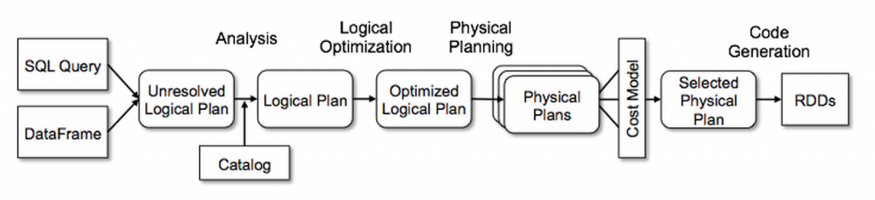

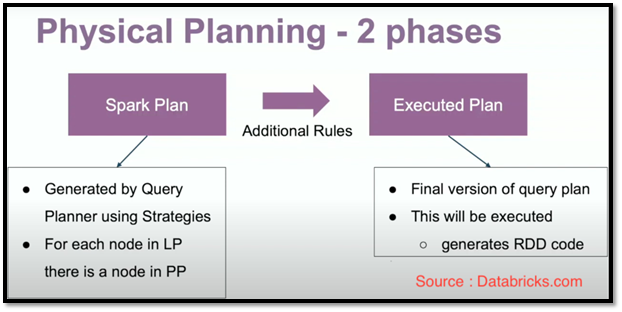

In [85]:
#View the optimized logical plan
df=viewsWithSchemaDF.filter((viewsWithSchemaDF["Domain"]=="en")&(viewsWithSchemaDF["pageName"].like("%:%"))).orderBy(viewsWithSchemaDF["viewCount"].desc())
df.explain(True)

== Parsed Logical Plan ==
Sort [viewCount#839 DESC NULLS LAST], true
+- AnalysisBarrier
      +- Filter ((Domain#829 = en) && pageName#834 LIKE %:%)
         +- Project [Domain#829, pageName#834, viewCount#839, cast(size#824 as bigint) AS size#844L]
            +- Project [Domain#829, pageName#834, cast(viewCount#819 as int) AS viewCount#839, size#824]
               +- Project [Domain#829, cast(pageName#814 as string) AS pageName#834, viewCount#819, size#824]
                  +- Project [cast(Domain#809 as string) AS Domain#829, pageName#814, viewCount#819, size#824]
                     +- Project [Domain#809, pageName#814, viewCount#819, splitLine[3]#796 AS size#824]
                        +- Project [Domain#809, pageName#814, splitLine[2]#795 AS viewCount#819, splitLine[3]#796]
                           +- Project [Domain#809, splitLine[1]#794 AS pageName#814, splitLine[2]#795, splitLine[3]#796]
                              +- Project [splitLine[0]#793 AS Domain#809, splitLine[

In [88]:
df.explain("codegen")

== Parsed Logical Plan ==
Sort [viewCount#839 DESC NULLS LAST], true
+- AnalysisBarrier
      +- Filter ((Domain#829 = en) && pageName#834 LIKE %:%)
         +- Project [Domain#829, pageName#834, viewCount#839, cast(size#824 as bigint) AS size#844L]
            +- Project [Domain#829, pageName#834, cast(viewCount#819 as int) AS viewCount#839, size#824]
               +- Project [Domain#829, cast(pageName#814 as string) AS pageName#834, viewCount#819, size#824]
                  +- Project [cast(Domain#809 as string) AS Domain#829, pageName#814, viewCount#819, size#824]
                     +- Project [Domain#809, pageName#814, viewCount#819, splitLine[3]#796 AS size#824]
                        +- Project [Domain#809, pageName#814, splitLine[2]#795 AS viewCount#819, splitLine[3]#796]
                           +- Project [Domain#809, splitLine[1]#794 AS pageName#814, splitLine[2]#795, splitLine[3]#796]
                              +- Project [splitLine[0]#793 AS Domain#809, splitLine[

In [89]:
df.explain("cost")

== Parsed Logical Plan ==
Sort [viewCount#839 DESC NULLS LAST], true
+- AnalysisBarrier
      +- Filter ((Domain#829 = en) && pageName#834 LIKE %:%)
         +- Project [Domain#829, pageName#834, viewCount#839, cast(size#824 as bigint) AS size#844L]
            +- Project [Domain#829, pageName#834, cast(viewCount#819 as int) AS viewCount#839, size#824]
               +- Project [Domain#829, cast(pageName#814 as string) AS pageName#834, viewCount#819, size#824]
                  +- Project [cast(Domain#809 as string) AS Domain#829, pageName#814, viewCount#819, size#824]
                     +- Project [Domain#809, pageName#814, viewCount#819, splitLine[3]#796 AS size#824]
                        +- Project [Domain#809, pageName#814, splitLine[2]#795 AS viewCount#819, splitLine[3]#796]
                           +- Project [Domain#809, splitLine[1]#794 AS pageName#814, splitLine[2]#795, splitLine[3]#796]
                              +- Project [splitLine[0]#793 AS Domain#809, splitLine[

### How to run SQL in Spark: 
- The sql function on a SparkSession enables applications to run SQL queries programmatically and returns the result as a DataFrame.
- Initially ,you need to create SQL temporary view to use sql function using "createOrReplaceTempView()"

In [16]:
# Register the DataFrame as a SQL temporary view
df.createOrReplaceTempView("influenza")
sqlDf=spark.sql("Select * from influenza")
sqlDf.show()

NameError: name 'df' is not defined

In [ ]:
spark.sql("Select * from influenza where region='Bay Area'").show(10)

In [ ]:
spark.sql("Select Count(*) from  influenza ").show()

In [ ]:
df.show(10)

In [ ]:
df.filter(df["Specimens_Tested"]>500).orderBy(df["region"]).show()

In [ ]:
df.filter(df["Specimens_Tested"]>500).orderBy(df["region"]).explain()

In [ ]:
spark.sql("Select * from influenza where Specimens_Tested >=500 Order By region").show()

In [ ]:
spark.sql("Select count(region),Respiratory_Virus from influenza where Number_Positive >=30 group by Respiratory_Virus order By count(region) desc").show()

In [ ]:
!wget https://storage.googleapis.com/tc-wiki-2020-bucket/pageviews-20200101-000000.gz

### Loading data Programmatically:
 - Parquet is a columnar format that is supported by many other data processing systems. 
 - Spark SQL provides support for both reading and writing Parquet files that automatically preserves the schema of the original data. 
 - When reading Parquet files, all columns are automatically converted to be nullable for compatibility reasons.

In [ ]:
# DataFrames can be saved as Parquet files, maintaining the schema information.
df.write.parquet("influenza.parquet")

In [ ]:
# Read in the Parquet file created above.
# Parquet files are self-describing so the schema is preserved.
# The result of loading a parquet file is also a DataFrame.
parquetFile=spark.read.parquet("influenza.parquet")

In [ ]:
parquetFile.show()

In [ ]:
parquetFile.printSchema()

In [ ]:
# Parquet files can also be used to create a temporary view and then used in SQL statements.
parquetFile.createOrReplaceTempView("parquetFile")

In [ ]:
spark.sql("Select * from parquetFile where Specimens_Tested >=35").show()

In [ ]:
spark.sql("Select * from parquetFile where Specimens_Tested >=35").count()

In [ ]:
df.write.json("influenza.json")

In [ ]:
jsonFile=spark.read.json("influenza.json")

In [ ]:
jsonFile.show()

In [ ]:
df1 = spark.read.load("/home/ec2-user/spark-2.3.1-bin-hadoop2.7/examples/src/main/resources/users.parquet")
df1.select("name", "favorite_color").write.save("namesAndFavColors.parquet")

In [ ]:
prRead=spark.read.parquet("namesAndFavColors.parquet")
prRead.show()

#### Use Case Day 4: UDF walkthrough

#### UDF:User Defined Function
- UDFs define new Column-based functions (for both DSL and SQL) 
- To define and use a UDF:
  - Define a regular function
  - Use udf() to wrap it 
  - (pyspark.sql.functions) 
  - Use it with the DSL - as shown below
> folksDF.filter(young_udf_boolean(folksDF.age)).show() +---+------+----+
|age|gender|name|
+---+------+----+
| 35|
| 40|
| 20|
+---+------+----+

In [12]:
# Define regular function to test age (some detail omitted ...)
def young(age):
    return age<45
from pyspark.sql.types import BooleanType
from pyspark.sql.functions import udf
young_udf_boolean = udf(lambda z: young(z), BooleanType())

In [13]:
mySchema = StructType().add("name", StringType()).add("gender", StringType()).add("age", IntegerType())
folksDF = spark.read.schema(mySchema).json("/home/ec2-user/spark-labs/data/people.json")
folksDF.show()

+----+------+---+
|name|gender|age|
+----+------+---+
|John|     M| 35|
|Jane|     F| 40|
|Mike|     M| 20|
| Sue|     F| 52|
+----+------+---+



In [14]:
folksDF.filter(young_udf_boolean(folksDF.age)).show()

+----+------+---+
|name|gender|age|
+----+------+---+
|John|     M| 35|
|Jane|     F| 40|
|Mike|     M| 20|
+----+------+---+



In [76]:
young(23)

True

In [15]:
folk=folksDF.filter(young_udf_boolean(folksDF.age))
folk.explain()

== Physical Plan ==
*(2) Project [name#6, gender#7, age#8]
+- *(2) Filter pythonUDF0#43: boolean
   +- BatchEvalPython [<lambda>(age#8)], [name#6, gender#7, age#8, pythonUDF0#43]
      +- *(1) FileScan json [name#6,gender#7,age#8] Batched: false, Format: JSON, Location: InMemoryFileIndex[file:/home/ec2-user/spark-labs/data/people.json], PartitionFilters: [], PushedFilters: [], ReadSchema: struct<name:string,gender:string,age:int>


In [78]:
from pyspark.sql.functions import udf
young_udf_boolean = udf(lambda z: young(z), BooleanType())

In [79]:
young_udf_boolean

<function __main__.<lambda>(z)>

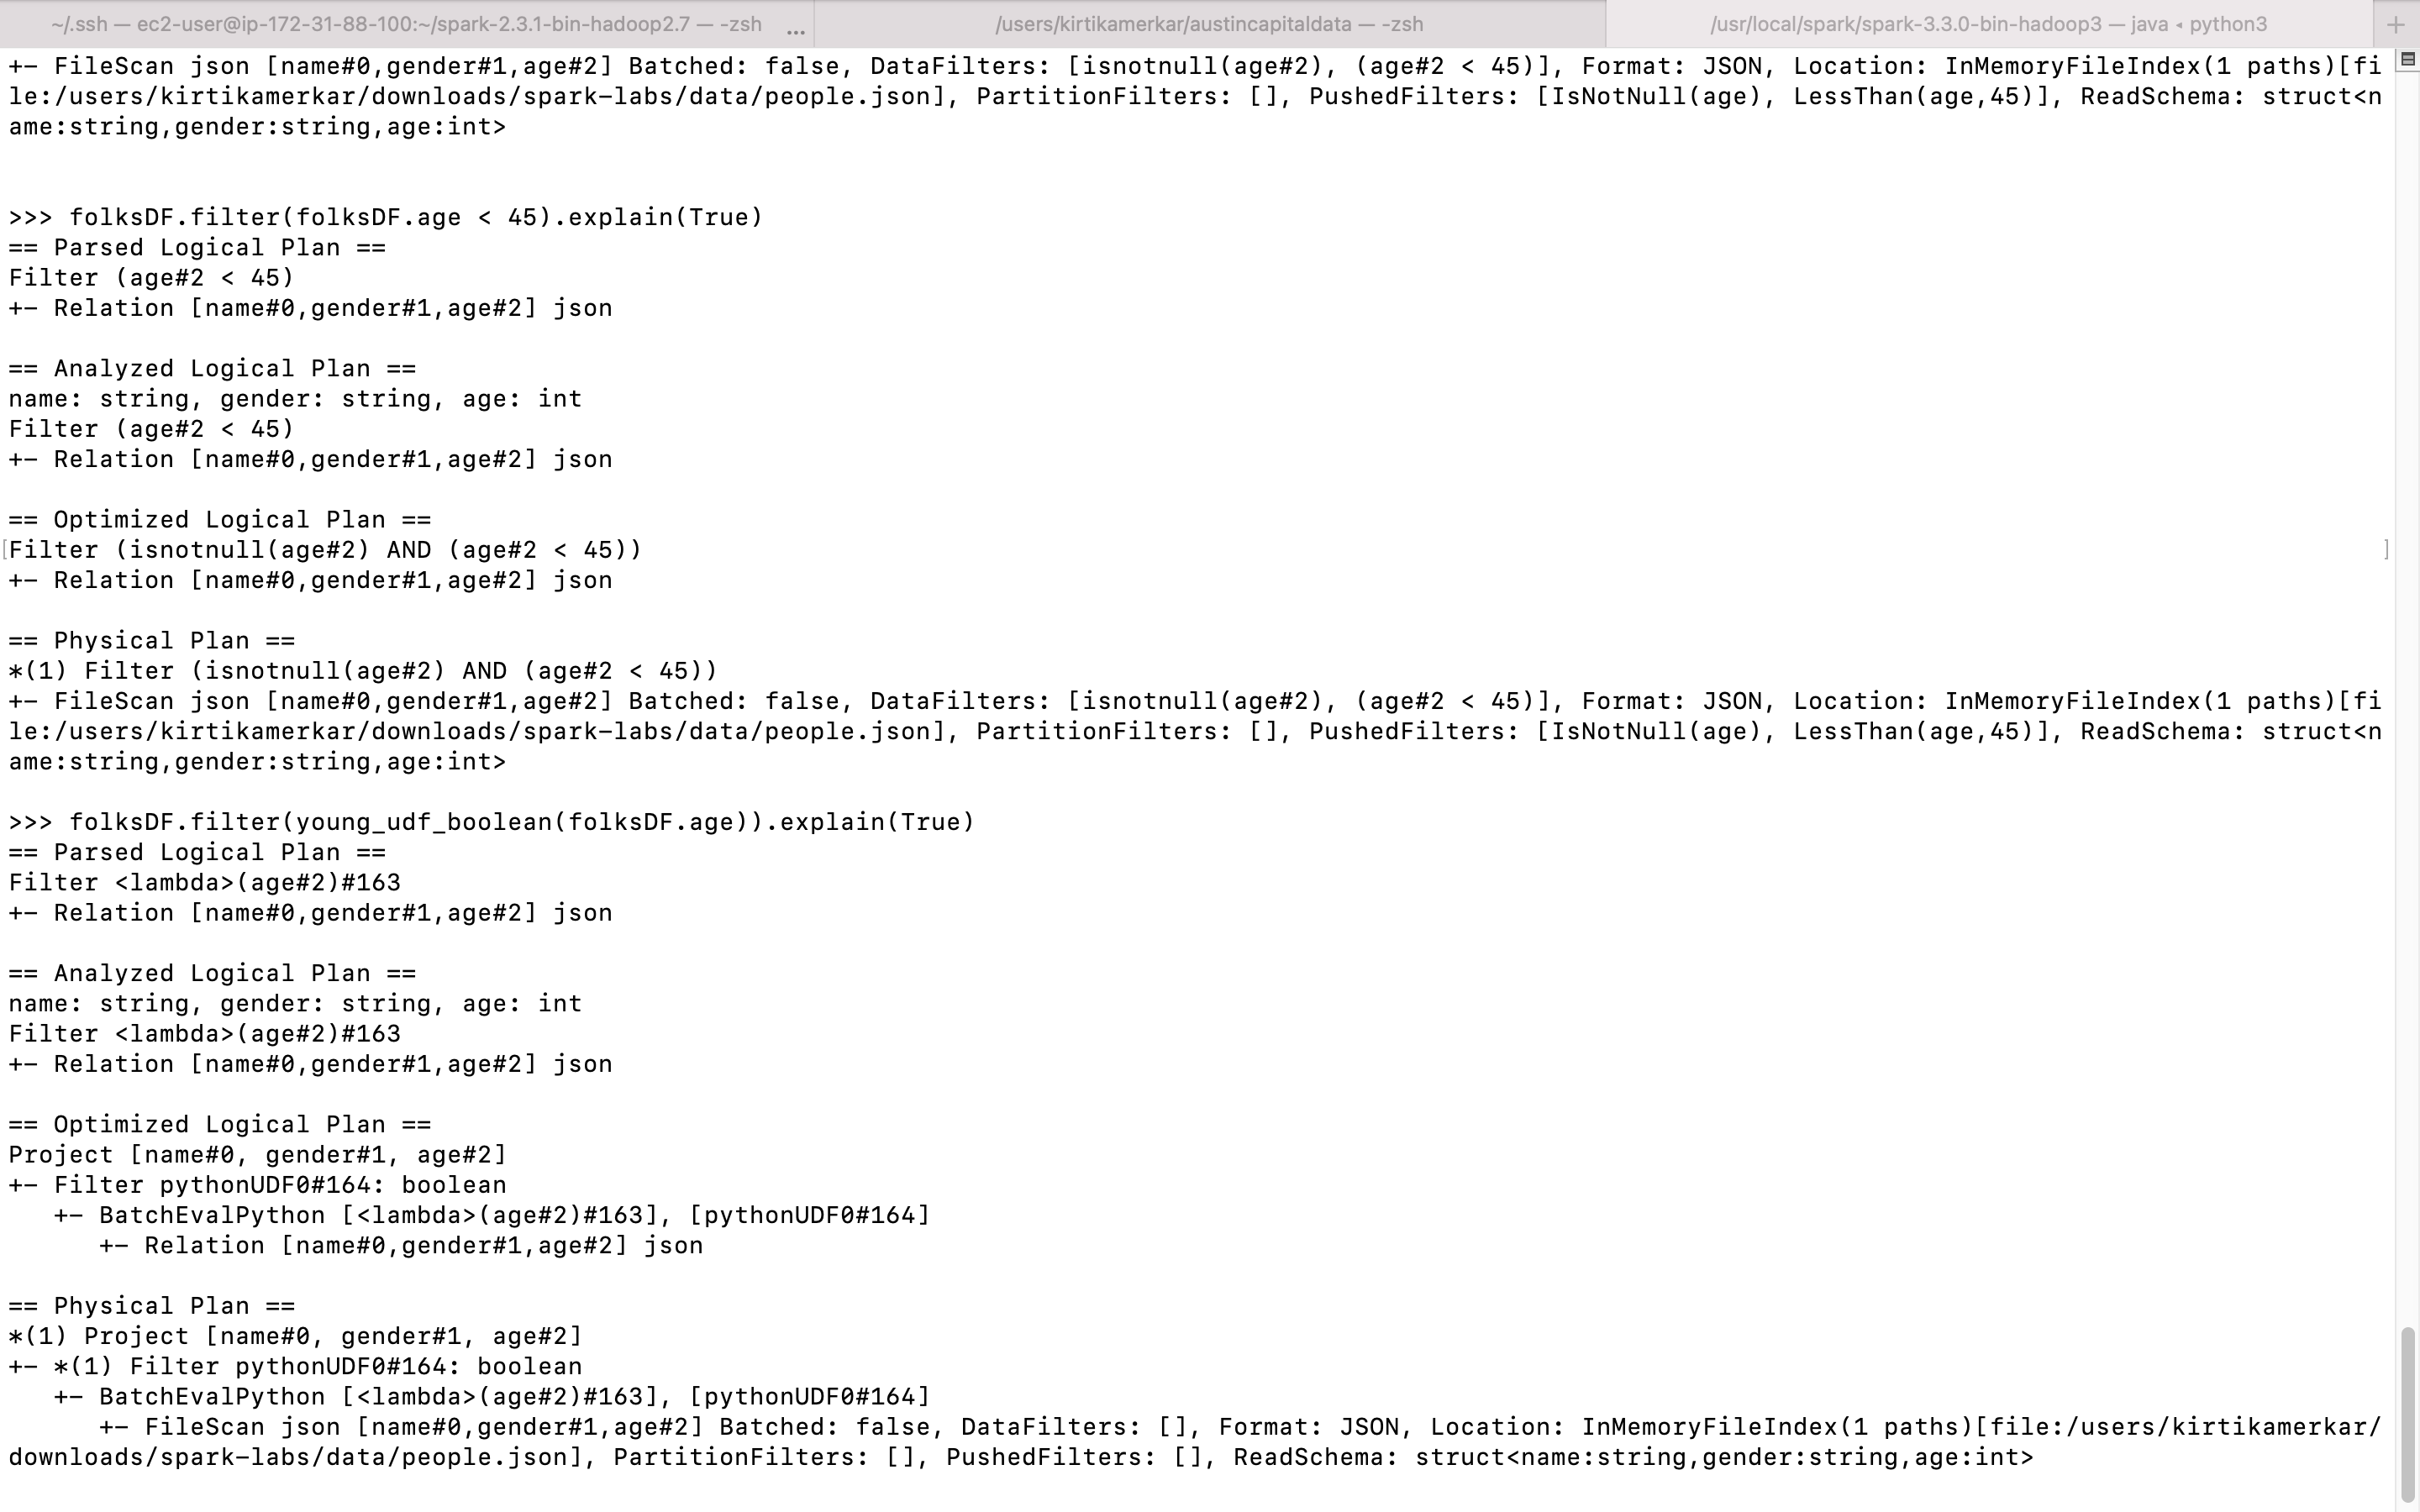

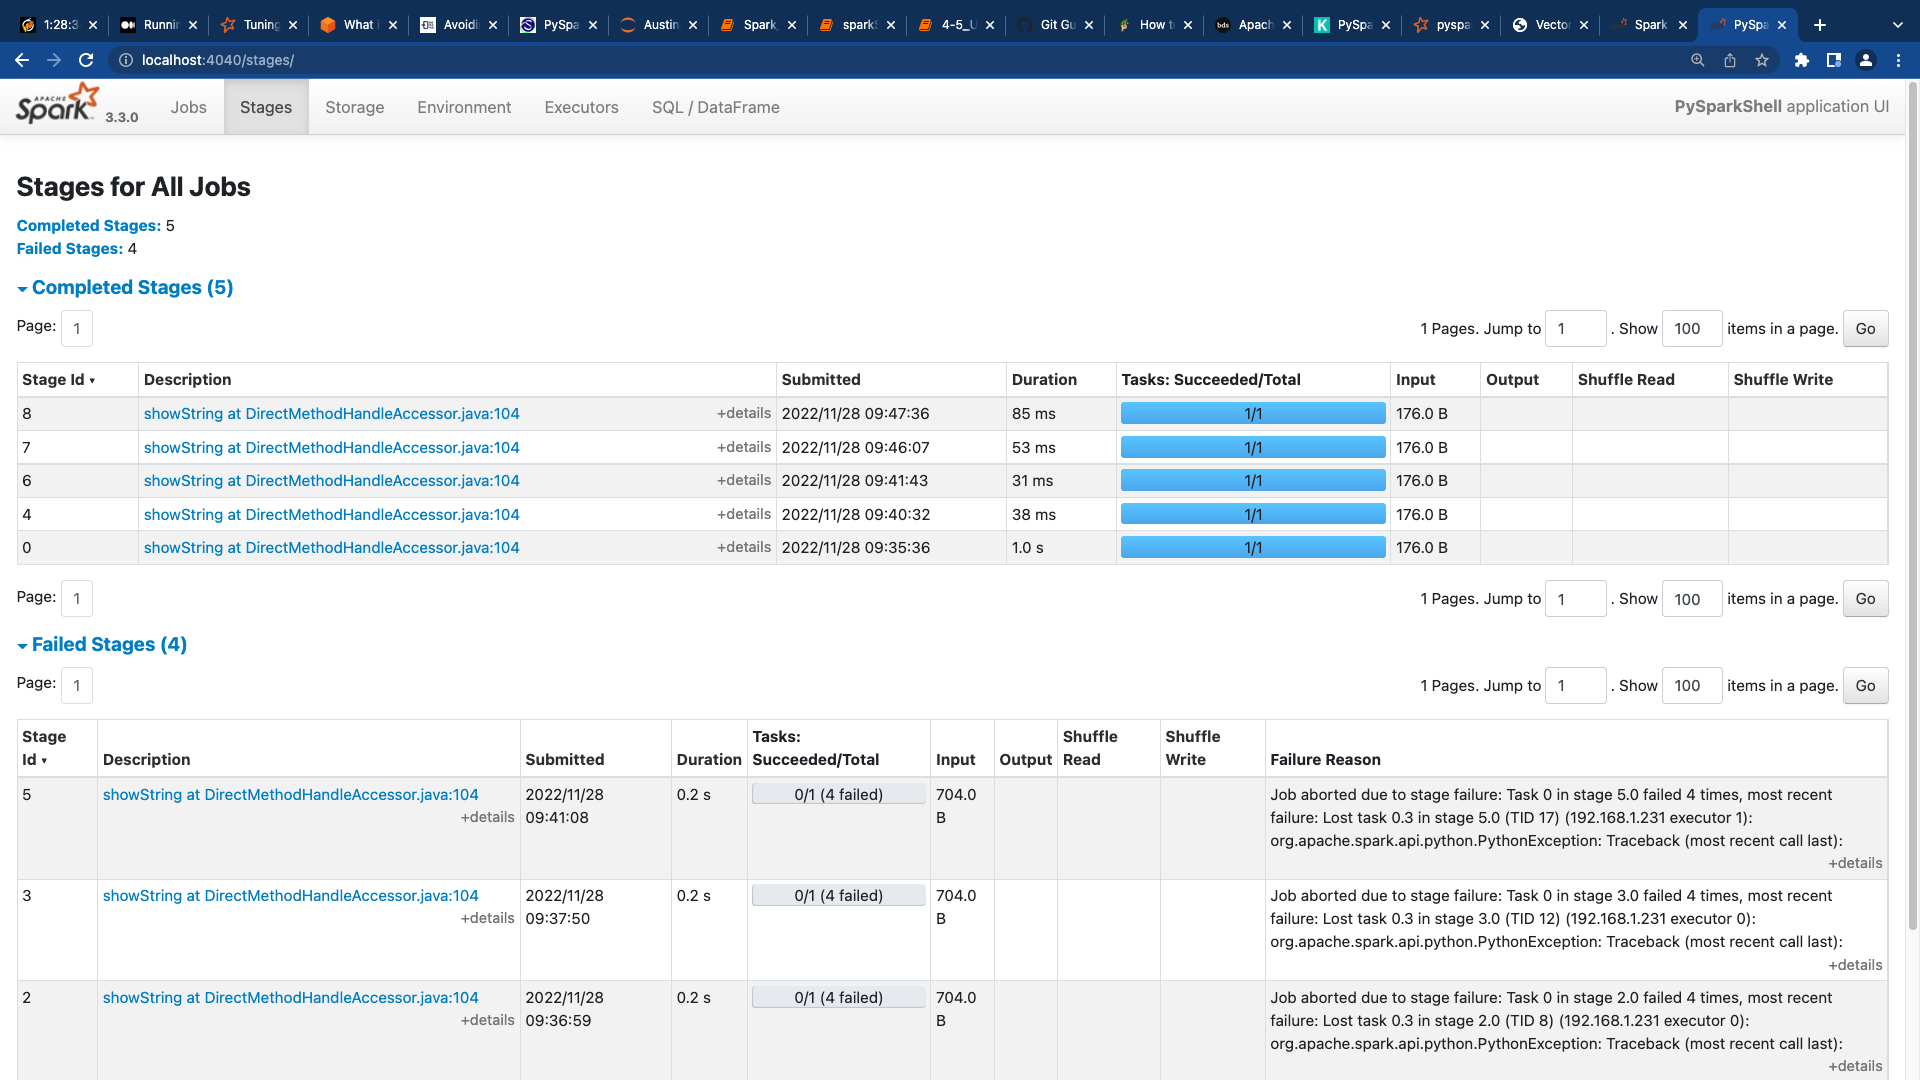

#### Why to avoid use of UDF in Spark :
- The Apache Spark engine is implemented in Java and Scala, languages that run on the JVM (Java Virtual Machine). 
- The use of the Python API requires an interaction between that JVM and the Python Runtime. 
- All this interaction is possible due to a library called py4j, which allows us to call code from the JVM. 
- At the same time, each Spark worker will have a Python Runtime running to execute UDFs.
- The code cannot be executed in the JVM, it will have to be in the Python Runtime. To make this possible, each row of the DataFrame is serialised, sent to the Python Runtime and returned to the JVM
- Due to this ,performance of spark affects.


#### Where to use UDF with optimizing perfromance?
-  If there is no a pyspark function, or combination of functions 
- If there ins no a SQL function .
- Improve the perfomance using Apache ARROW which uses UDF and pandas functions,which is nothing but vectorized UDF.

#### Vectorized UDF:
- A pandas user-defined function (UDF)—also known as vectorized UDF—is a user-defined function that uses Apache Arrow to transfer data and pandas to work with the data. pandas UDFs allow vectorized operations that can increase perfYou define a pandas UDF using the keyword pandas_udf as a decorator and wrap the function with a Python type hinormance up to 100x compared to row-at-a-time Python UDFs.
- You define a pandas UDF using the keyword pandas_udf as a decorator and wrap the function with a Python type hint. 

In [1]:
#Build basic spark session
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL Demo") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/11/29 13:06:17 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
import pandas as pd
from pyspark.sql.functions import pandas_udf
from pyspark.sql import Window

In [3]:
df = spark.createDataFrame(
    [(1, 1.0), (1, 2.0), (2, 3.0), (2, 5.0), (2, 10.0)],
    ("id", "v"))


In [4]:
df.show()

+---+----+
| id|   v|
+---+----+
|  1| 1.0|
|  1| 2.0|
|  2| 3.0|
|  2| 5.0|
|  2|10.0|
+---+----+



In [6]:
# Declare the function and create the UDF
@pandas_udf("double")
def mean_udf(v: pd.Series) -> float:
    return v.mean()

In [7]:
df.select(mean_udf(df['v'])).show()

+-----------+
|mean_udf(v)|
+-----------+
|        4.2|
+-----------+



In [8]:
df.groupby("id").agg(mean_udf(df['v'])).show()

+---+-----------+
| id|mean_udf(v)|
+---+-----------+
|  1|        1.5|
|  2|        6.0|
+---+-----------+



In [3]:
from pyspark.sql.types import *
from pyspark.sql.functions import *
# Declare the function and create the UDF
@pandas_udf("string")
def to_upper(s: pd.Series) -> pd.Series:
    return s.str.upper()

In [4]:
from pyspark.sql.types import *
from pyspark.sql.functions import *
mySchema = StructType().add("name", StringType()).add("gender", StringType()).add("age", IntegerType())
folksDF = spark.read.schema(mySchema).json("/users/kirtikamerkar/downloads/spark-labs/data/people.json")
folksDF.show()

+----+------+---+
|name|gender|age|
+----+------+---+
|John|     M| 35|
|Jane|     F| 40|
|Mike|     M| 20|
| Sue|     F| 52|
+----+------+---+



In [7]:
#Vectorized UDF-panda_udf
folksDF.select(to_upper("name")).show()
folksDF.select(to_upper("name")).explain(True)

+--------------+
|to_upper(name)|
+--------------+
|          JOHN|
|          JANE|
|          MIKE|
|           SUE|
+--------------+

== Parsed Logical Plan ==
'Project [unresolvedalias(to_upper('name)#77, Some(org.apache.spark.sql.Column$$Lambda$2862/0x000000080197bbd8@4accffe6))]
+- Relation [name#0,gender#1,age#2] json

== Analyzed Logical Plan ==
to_upper(name): string
Project [to_upper(name#0)#77 AS to_upper(name)#78]
+- Relation [name#0,gender#1,age#2] json

== Optimized Logical Plan ==
Project [pythonUDF0#80 AS to_upper(name)#78]
+- ArrowEvalPython [to_upper(name#0)#77], [pythonUDF0#80], 200
   +- Project [name#0]
      +- Relation [name#0,gender#1,age#2] json

== Physical Plan ==
*(1) Project [pythonUDF0#80 AS to_upper(name)#78]
+- ArrowEvalPython [to_upper(name#0)#77], [pythonUDF0#80], 200
   +- FileScan json [name#0] Batched: false, DataFilters: [], Format: JSON, Location: InMemoryFileIndex(1 paths)[file:/users/kirtikamerkar/downloads/spark-labs/data/people.json], Partitio

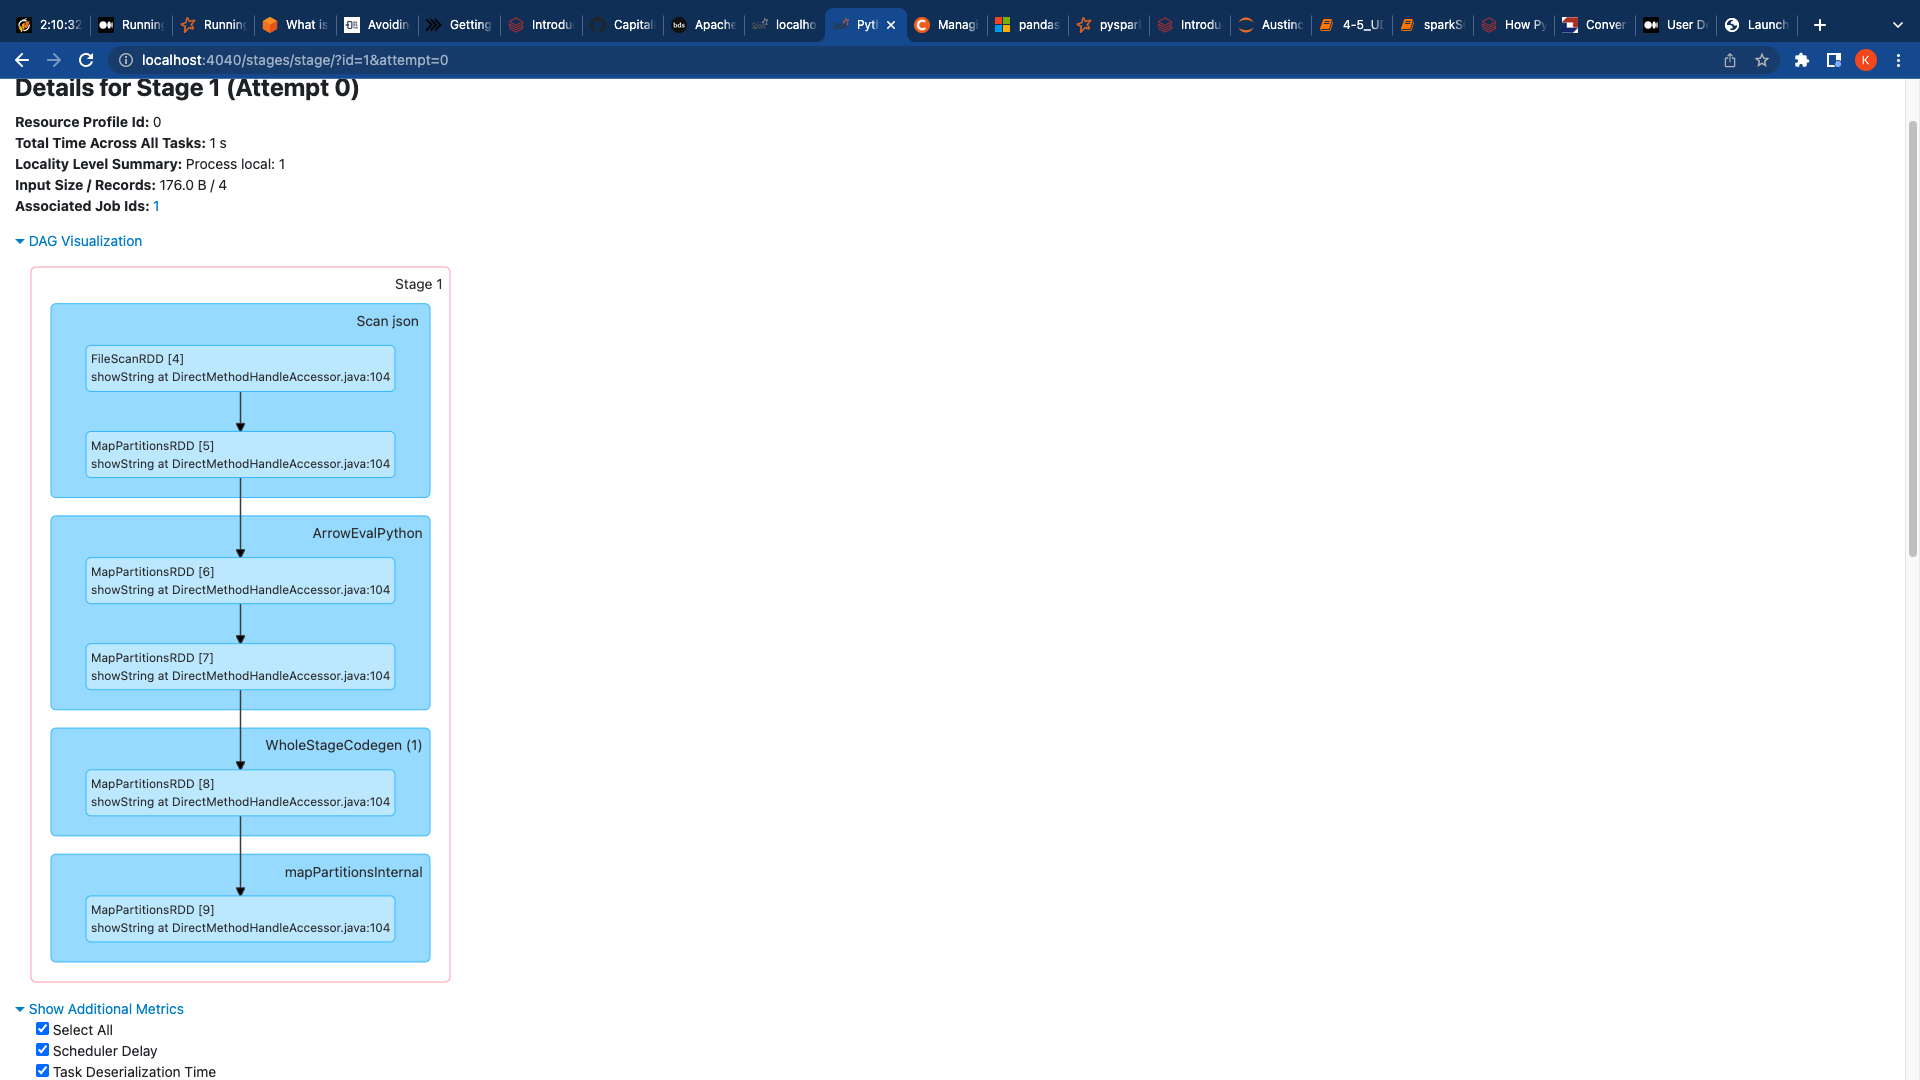

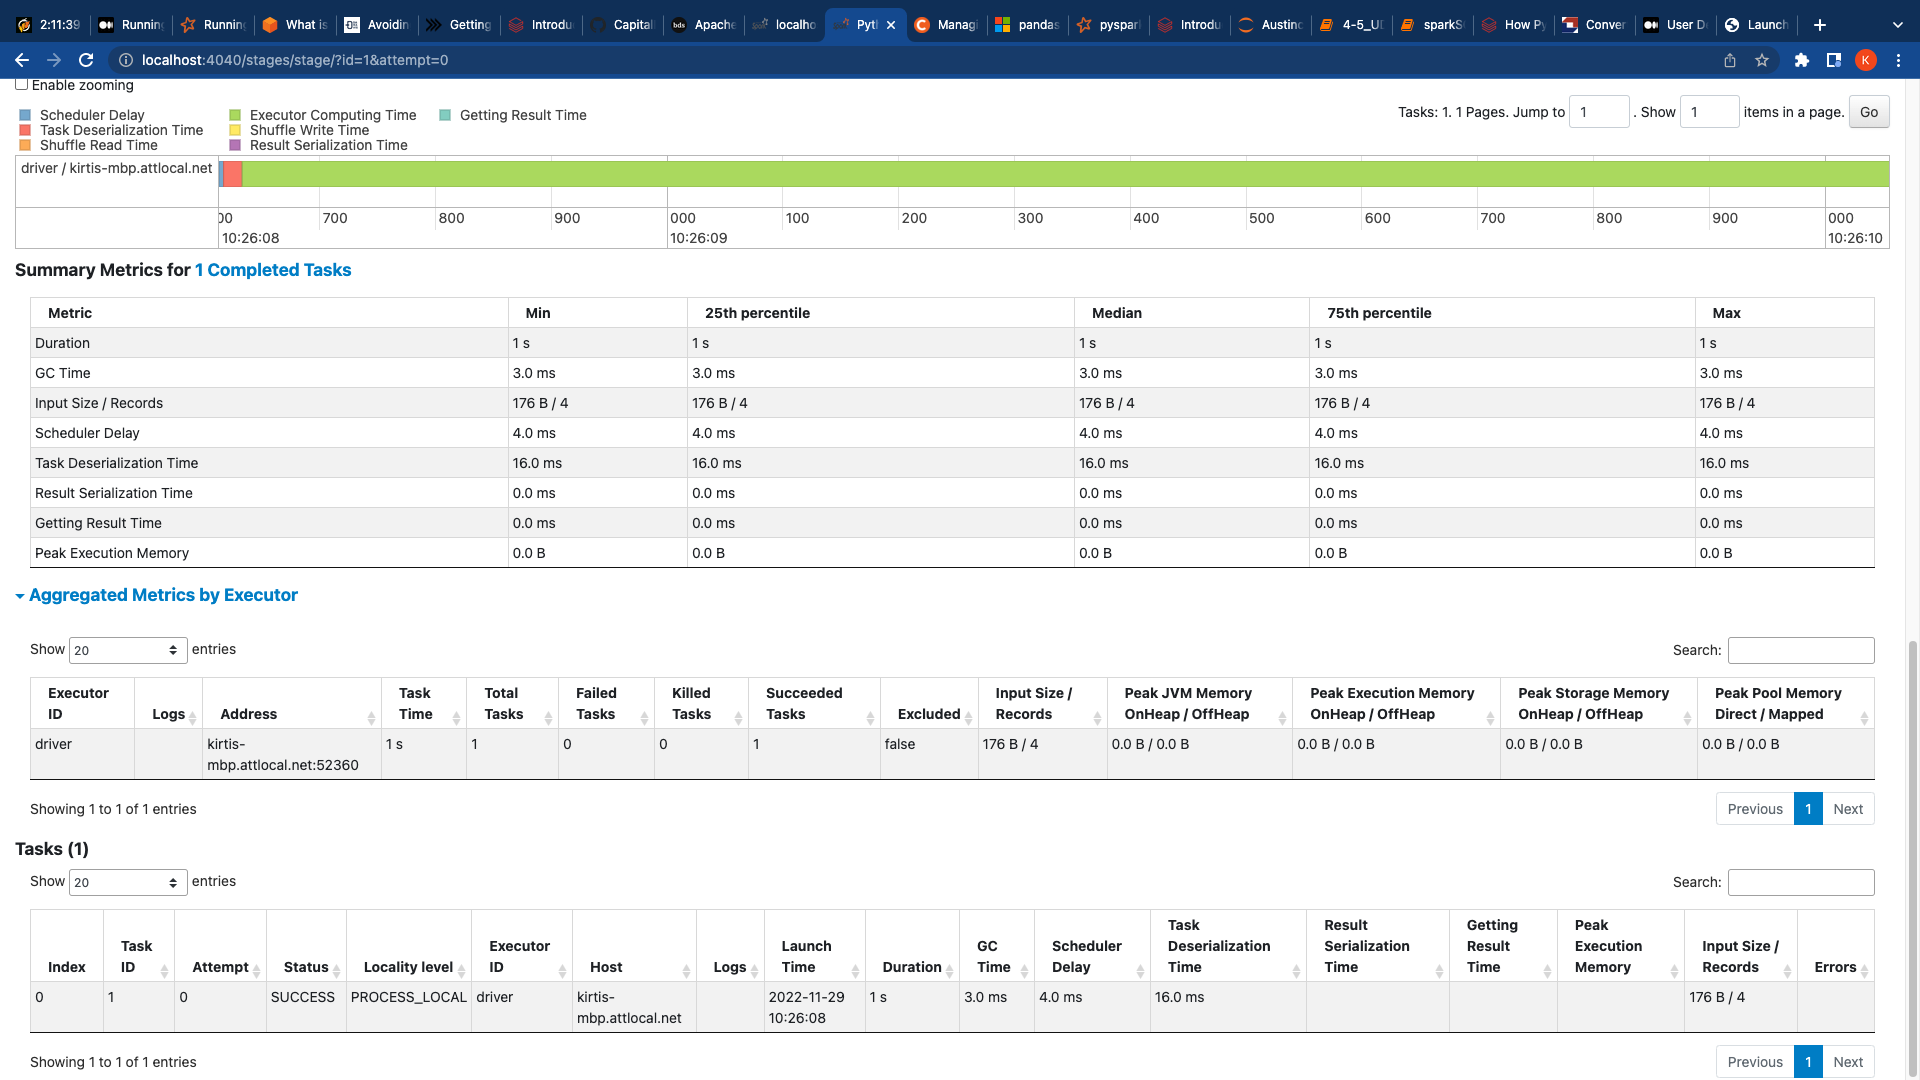

In [6]:
#Pyspark built in function
folksDF.select("*",upper(col("name"))).show()
folksDF.select("*",upper(col("name"))).explain(True)

+----+------+---+-----------+
|name|gender|age|upper(name)|
+----+------+---+-----------+
|John|     M| 35|       JOHN|
|Jane|     F| 40|       JANE|
|Mike|     M| 20|       MIKE|
| Sue|     F| 52|        SUE|
+----+------+---+-----------+

== Parsed Logical Plan ==
'Project [*, unresolvedalias(upper('name), Some(org.apache.spark.sql.Column$$Lambda$2862/0x000000080197bbd8@4accffe6))]
+- Relation [name#0,gender#1,age#2] json

== Analyzed Logical Plan ==
name: string, gender: string, age: int, upper(name): string
Project [name#0, gender#1, age#2, upper(name#0) AS upper(name)#62]
+- Relation [name#0,gender#1,age#2] json

== Optimized Logical Plan ==
Project [name#0, gender#1, age#2, upper(name#0) AS upper(name)#62]
+- Relation [name#0,gender#1,age#2] json

== Physical Plan ==
*(1) Project [name#0, gender#1, age#2, upper(name#0) AS upper(name)#62]
+- FileScan json [name#0,gender#1,age#2] Batched: false, DataFilters: [], Format: JSON, Location: InMemoryFileIndex(1 paths)[file:/users/kirtika

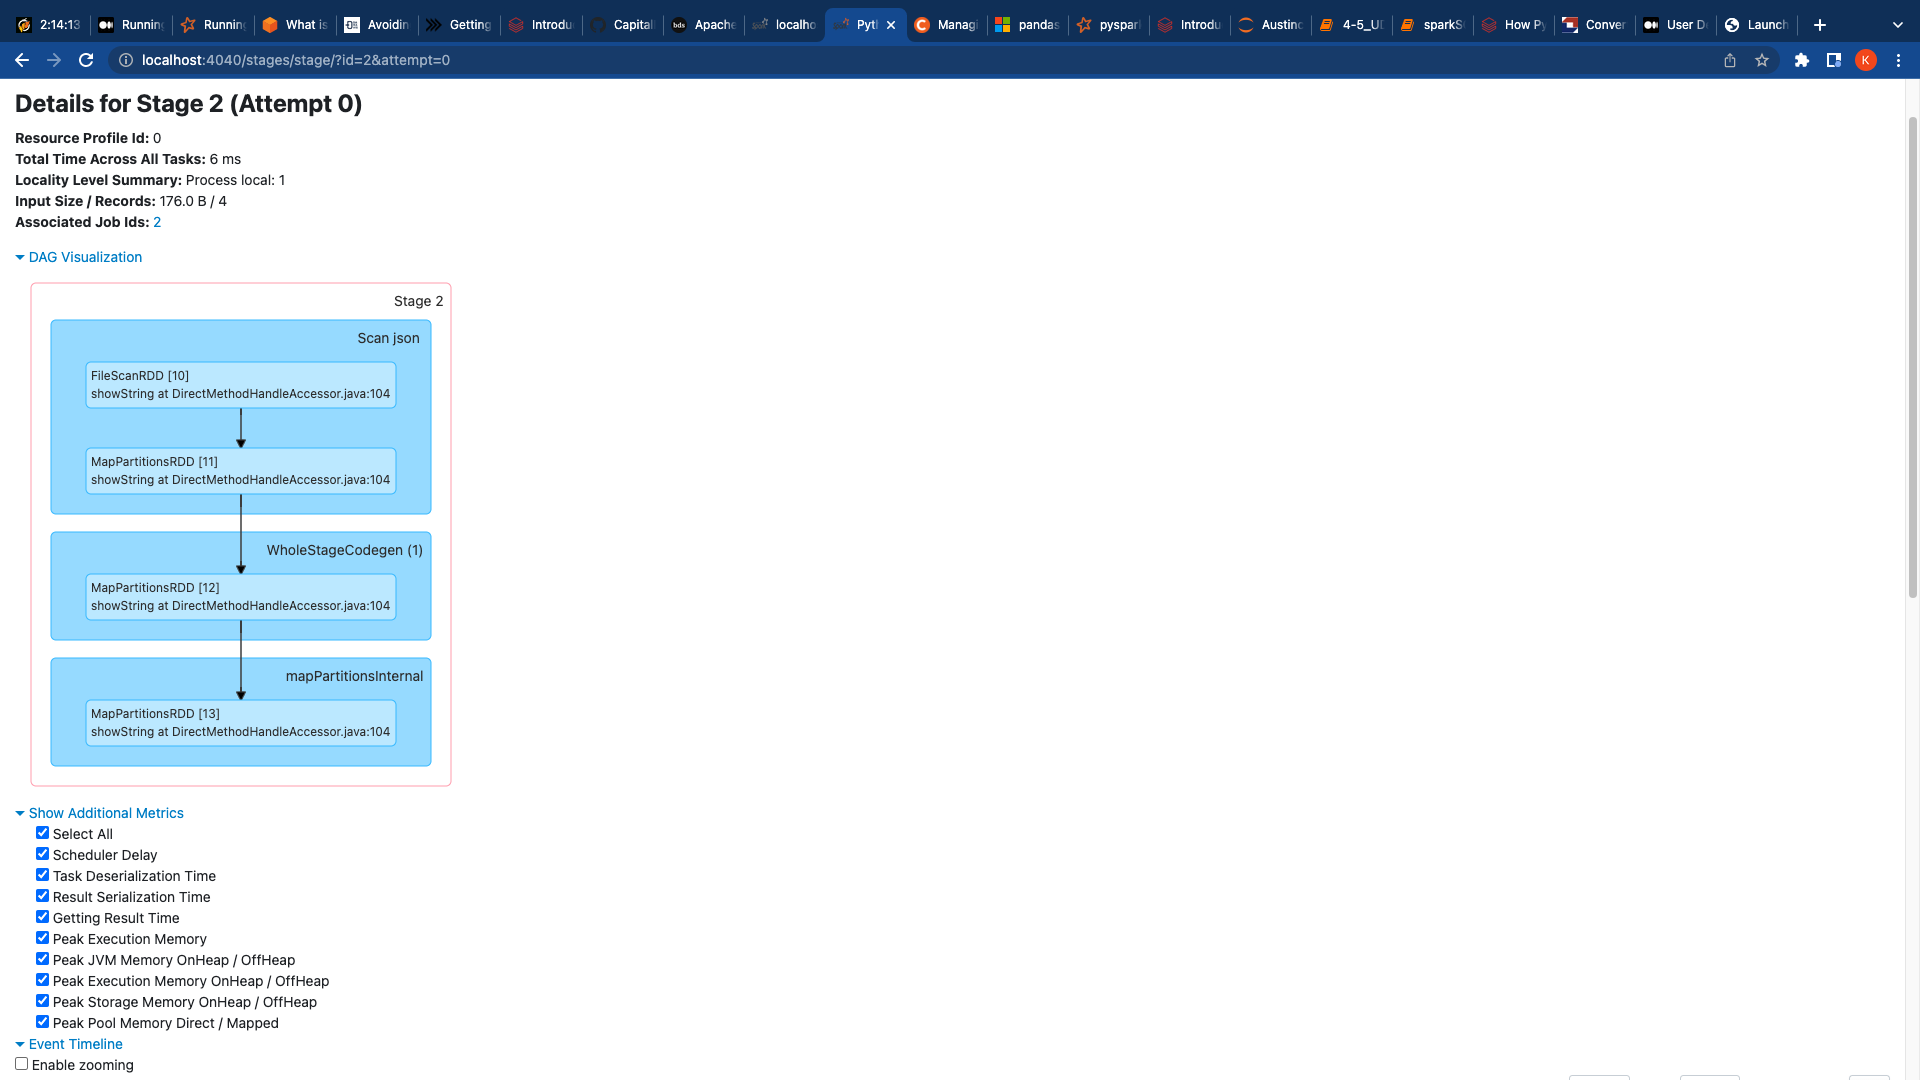

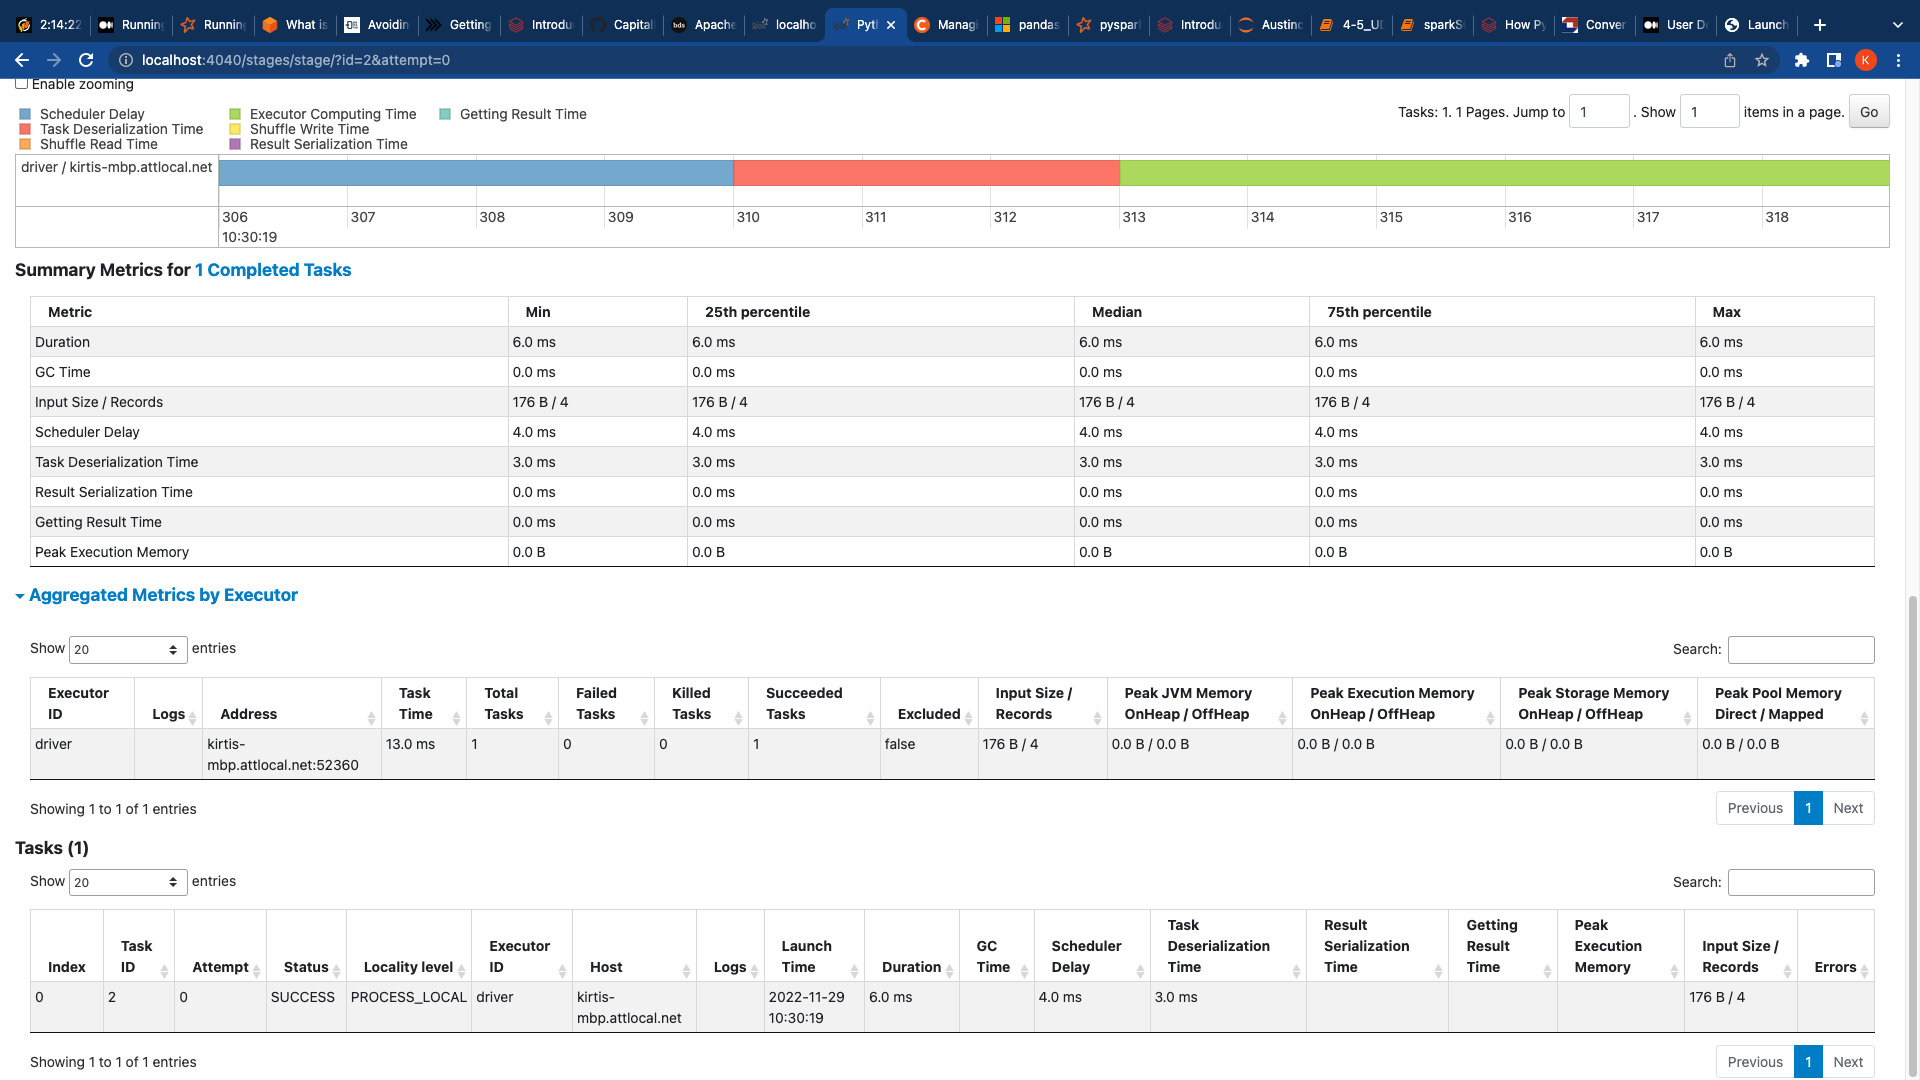

In [8]:
#Using udf
def upperCase(str):
    return str.upper()
# make udf 
upper_udf = udf(lambda z:  upperCase(z), StringType())

In [9]:
folksDF.withColumn("Name", upper_udf(col("name"))) \
  .show(truncate=False)
folksDF.withColumn("Name", upper_udf(col("name"))).explain(True)

+----+------+---+
|Name|gender|age|
+----+------+---+
|JOHN|M     |35 |
|JANE|F     |40 |
|MIKE|M     |20 |
|SUE |F     |52 |
+----+------+---+

== Parsed Logical Plan ==
'Project [<lambda>('name)#103 AS Name#104, gender#1, age#2]
+- Relation [name#0,gender#1,age#2] json

== Analyzed Logical Plan ==
Name: string, gender: string, age: int
Project [<lambda>(name#0)#103 AS Name#104, gender#1, age#2]
+- Relation [name#0,gender#1,age#2] json

== Optimized Logical Plan ==
Project [pythonUDF0#108 AS Name#104, gender#1, age#2]
+- BatchEvalPython [<lambda>(name#0)#103], [pythonUDF0#108]
   +- Relation [name#0,gender#1,age#2] json

== Physical Plan ==
*(1) Project [pythonUDF0#108 AS Name#104, gender#1, age#2]
+- BatchEvalPython [<lambda>(name#0)#103], [pythonUDF0#108]
   +- FileScan json [name#0,gender#1,age#2] Batched: false, DataFilters: [], Format: JSON, Location: InMemoryFileIndex(1 paths)[file:/users/kirtikamerkar/downloads/spark-labs/data/people.json], PartitionFilters: [], PushedFilters: 

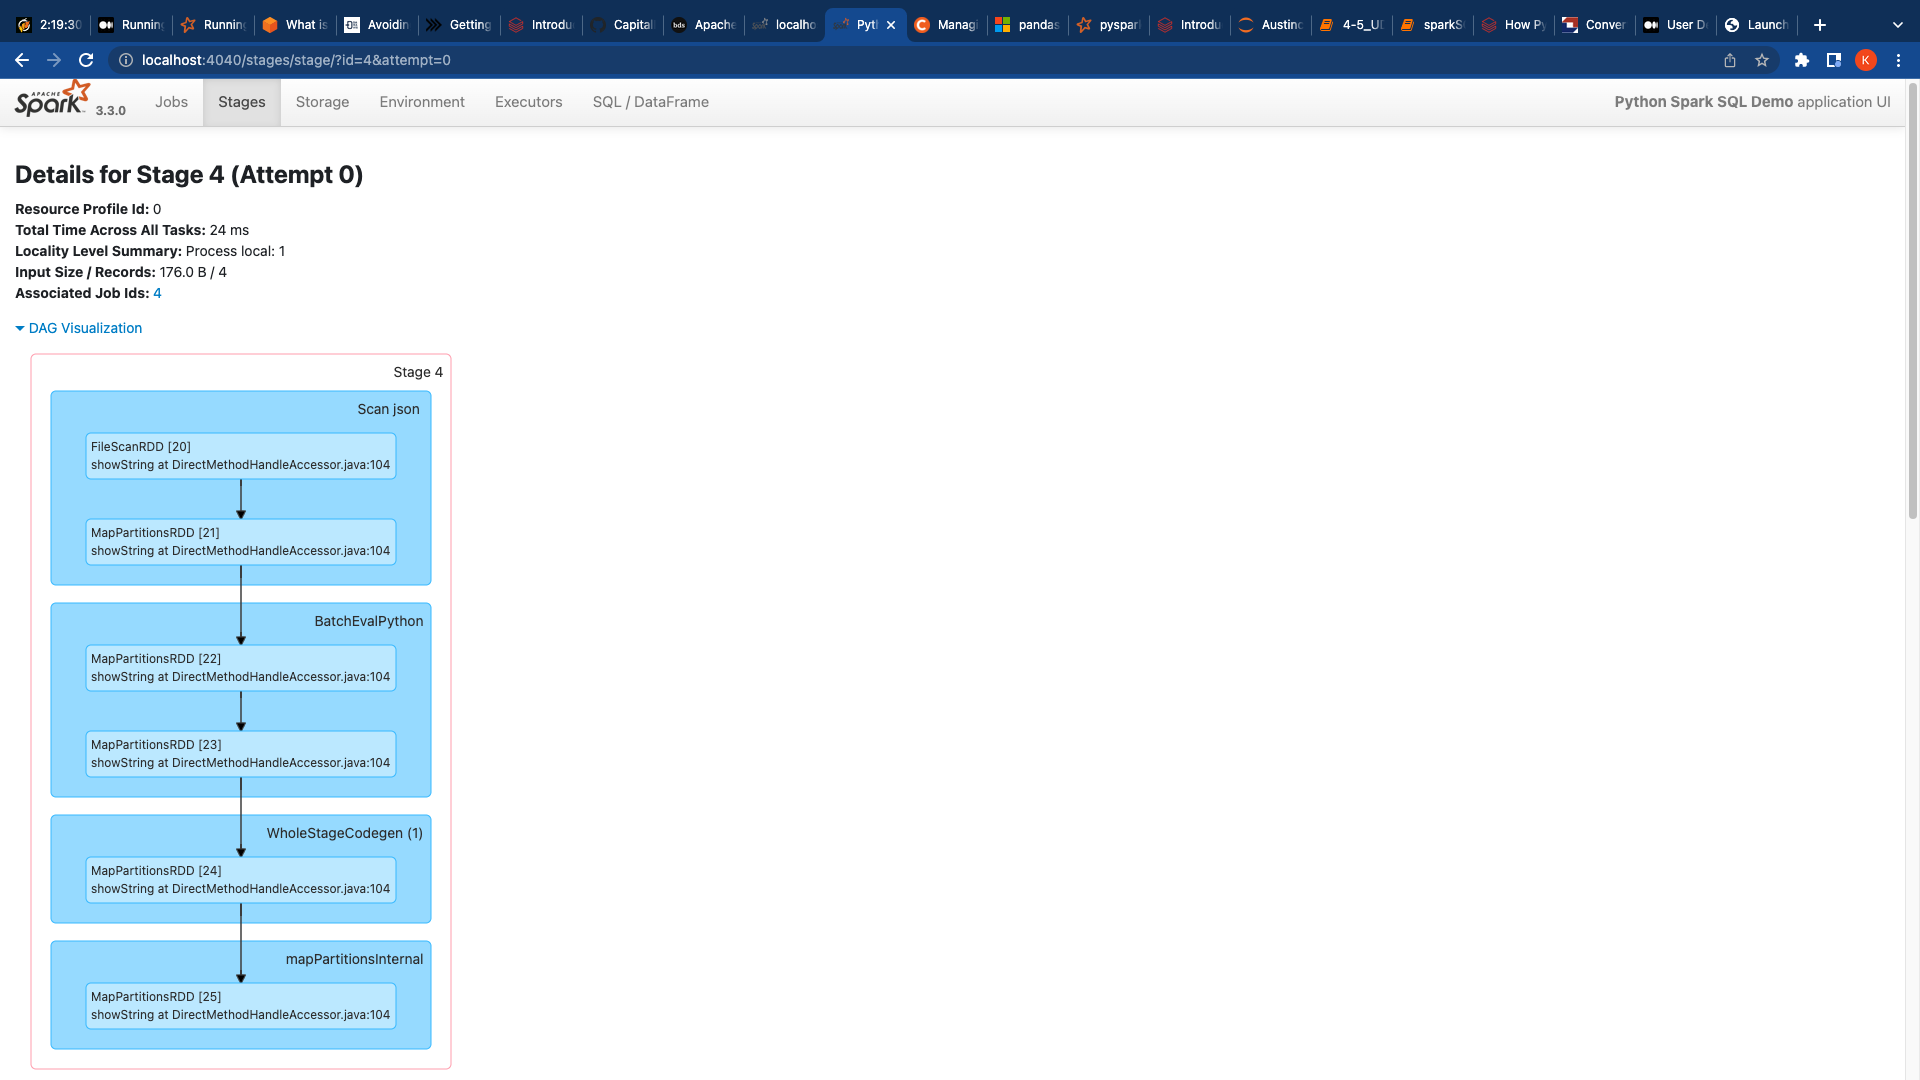

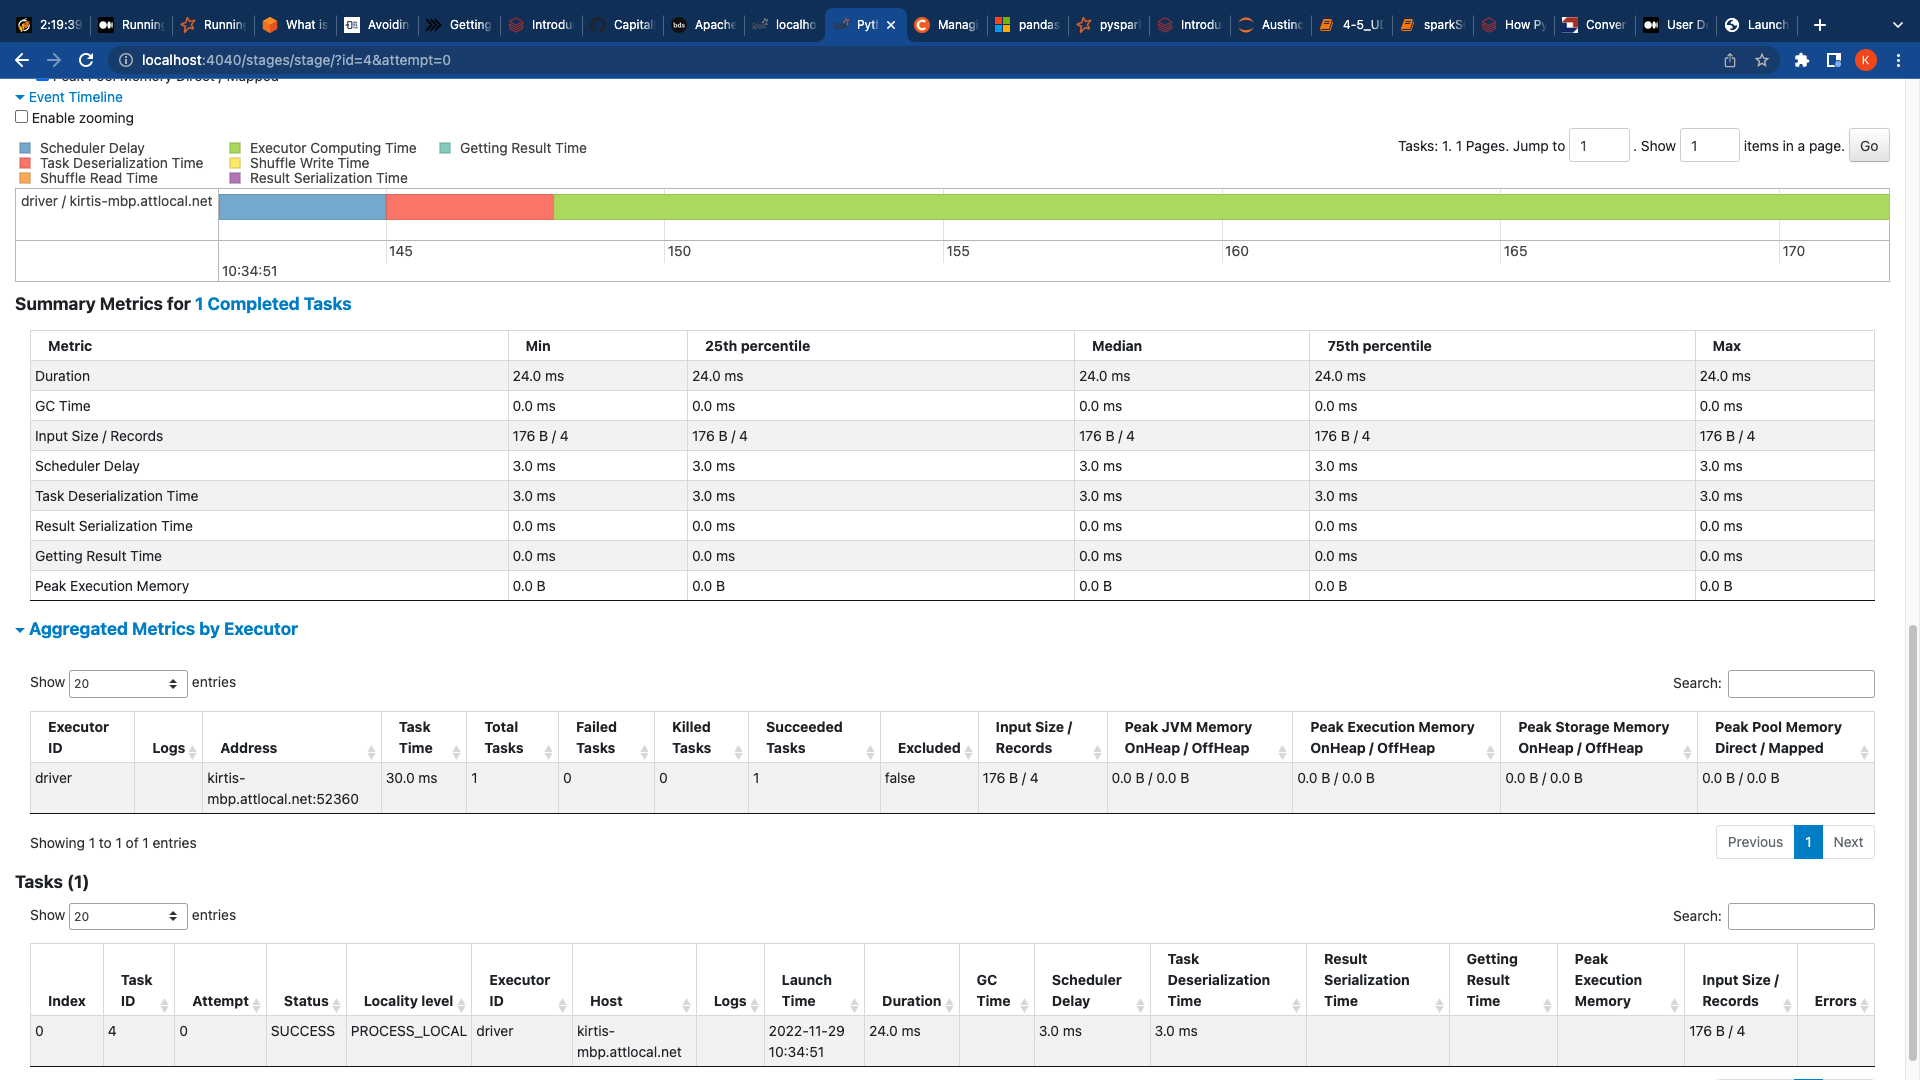

In [13]:
folksDF.select(upper_udf(col("name"))).show()
folksDF.select(upper_udf(col("name"))).explain(True)

+--------------+
|<lambda>(name)|
+--------------+
|          JOHN|
|          JANE|
|          MIKE|
|           SUE|
+--------------+

== Parsed Logical Plan ==
'Project [unresolvedalias(<lambda>('name)#132, Some(org.apache.spark.sql.Column$$Lambda$2862/0x000000080197aa40@306cc83d))]
+- Relation [name#0,gender#1,age#2] json

== Analyzed Logical Plan ==
<lambda>(name): string
Project [<lambda>(name#0)#132 AS <lambda>(name)#133]
+- Relation [name#0,gender#1,age#2] json

== Optimized Logical Plan ==
Project [pythonUDF0#135 AS <lambda>(name)#133]
+- BatchEvalPython [<lambda>(name#0)#132], [pythonUDF0#135]
   +- Project [name#0]
      +- Relation [name#0,gender#1,age#2] json

== Physical Plan ==
*(1) Project [pythonUDF0#135 AS <lambda>(name)#133]
+- BatchEvalPython [<lambda>(name#0)#132], [pythonUDF0#135]
   +- FileScan json [name#0] Batched: false, DataFilters: [], Format: JSON, Location: InMemoryFileIndex(1 paths)[file:/users/kirtikamerkar/downloads/spark-labs/data/people.json], Partiti

In [1]:
## Write out the notebook to reveal.js slides
!jupyter nbconvert sparkSQL_notebook.ipynb --to slides --post serve --SlidesExporter.reveal_theme=serif --SlidesExporter.reveal_scroll=True --SlidesExporter.reveal_transition=none

[NbConvertApp] Converting notebook sparkSQL_notebook.ipynb to slides
[NbConvertApp] Writing 3985470 bytes to sparkSQL_notebook.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/sparkSQL_notebook.slides.html
Use Control-C to stop this server
^C

Interrupted


#### References:
- https://blog.damavis.com/en/avoiding-udfs-in-apache-spark/
- https://learn.microsoft.com/en-us/azure/databricks/udf/pandas